## Import Project Dependencies

In [1]:
import sys
#sys.path.append("/home/dse/kaggle/py27xgboost/xgboost/python-package")
sys.path.append("/opt/conda/lib/python3.5/site-packages/ml_metrics-0.1.4-py3.5.egg")

In [2]:
# multiclass classification
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import ml_metrics as metrics

/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [3]:
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

scipy: 0.18.0
numpy: 1.11.1
matplotlib: 1.5.1
pandas: 0.18.1
sklearn: 0.18


## Load the Data Set

In [4]:
ames_train = pd.read_csv("../data/ames_train.csv")
ames_test = pd.read_csv("../data/ames_test.csv")
ames_train.head(15)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   

   LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
0          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1          Lvl    AllPub    ...            0    NaN    NaN         NaN   
2          Lvl    AllPub    ...            0    NaN    NaN         NaN   
3          Lvl    AllPub    ...            0    NaN    NaN         NaN   
4          Lvl    AllPub    ...            0    NaN    NaN         NaN   
5          Lvl    AllPub    ...            0    NaN  MnPrv        Shed   
6          Lvl    AllPub    ...            0    NaN    NaN         NaN   
7          Lvl    AllPub    ...            0    NaN    NaN        Shed   
8          Lvl    AllPub    ...            0    NaN    NaN         NaN   
9          Lvl    AllPub    ...            0    NaN    NaN         NaN   
10         Lvl    AllPub    ...            0    NaN    NaN         NaN   
11         Lvl    AllPub    ...            0    NaN    NaN         NaN   
12         Lvl    AllPub    ...            0    NaN    NaN         NaN   
13         Lvl    AllPub    ...            0    NaN    NaN         NaN   
14         Lvl    AllPub    ...            0    NaN   GdWo         NaN   

   MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        0      2   2008        WD         Normal     208500  
1        0      5   2007        WD         Normal     181500  
2        0      9   2008        WD         Normal     223500  
3        0      2   2006        WD        Abnorml     140000  
4        0     12   2008        WD         Normal     250000  
5      700     10   2009        WD         Normal     143000  
6        0      8   2007        WD         Normal     307000  
7      350     11   2009        WD         Normal     200000  
8        0      4   2008        WD        Abnorml     129900  
9        0      1   2008        WD         Normal     118000  
10       0      2   2008        WD         Normal     129500  
11       0      7   2006       New        Partial     345000  
12       0      9   2008        WD         Normal     144000  
13       0      8   2007       New        Partial     279500  
14       0      5   2008        WD         Normal     157000  

[15 rows x 81 columns]

## Exploratory Data Analysis

### Descriptive Statistics

In [5]:
ames_train.shape

(1459, 81)

In [96]:
ames_test.shape

(1459, 80)

In [6]:
# data types for each attribute
ames_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = ames_train.describe()
print(description)

             Id  MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  YearBuilt  \
count  1459.000    1459.000     1200.000    1459.000     1459.000     1459.000   1459.000   
mean    730.000      56.923       70.046   10517.225        6.100        5.575   1971.272   
std     421.321      42.304       24.294    9984.676        1.383        1.113     30.213   
min       1.000      20.000       21.000    1300.000        1.000        1.000   1872.000   
25%     365.500      20.000          NaN    7549.000        5.000        5.000   1954.000   
50%     730.000      50.000          NaN    9477.000        6.000        5.000   1973.000   
75%    1094.500      70.000          NaN   11603.000        7.000        6.000   2000.000   
max    1459.000     190.000      313.000  215245.000       10.000        9.000   2010.000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1     ...      WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count      1459.000    1451.000    1459.000     ...        1459

/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [8]:
description = ames_test.describe()
print(description)

             Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  \
count  1459.000    1459.000     1232.000   1459.000     1459.000     1459.000   1459.000   
mean   2190.000      57.378       68.580   9819.161        6.079        5.554   1971.358   
std     421.321      42.747       22.377   4955.517        1.437        1.114     30.390   
min    1461.000      20.000       21.000   1470.000        1.000        1.000   1879.000   
25%    1825.500      20.000          NaN   7391.000        5.000        5.000   1953.000   
50%    2190.000      50.000          NaN   9399.000        6.000        5.000   1973.000   
75%    2554.500      70.000          NaN  11517.500        7.000        6.000   2001.000   
max    2919.000     190.000      200.000  56600.000       10.000        9.000   2010.000   

       YearRemodAdd  MasVnrArea  BsmtFinSF1    ...     GarageArea  WoodDeckSF  OpenPorchSF  \
count      1459.000    1444.000    1458.000    ...       1458.000    1459.000

The summary statistics above shows differences, I'll perform analysis on the in time and out of time validation set to spot feature distribution plots.

## Correlations Between Attributes

In [9]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = ames_train.corr(method='pearson')
print(correlations)

                      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id             1.000e+00       0.012       -0.011   -0.033       -0.027        0.012     -0.012   
MSSubClass     1.221e-02       1.000       -0.386   -0.140        0.032       -0.059      0.028   
LotFrontage   -1.091e-02      -0.386        1.000    0.426        0.252       -0.059      0.123   
LotArea       -3.319e-02      -0.140        0.426    1.000        0.106       -0.006      0.014   
OverallQual   -2.746e-02       0.032        0.252    0.106        1.000       -0.092      0.572   
OverallCond    1.217e-02      -0.059       -0.059   -0.006       -0.092        1.000     -0.376   
YearBuilt     -1.248e-02       0.028        0.123    0.014        0.572       -0.376      1.000   
YearRemodAdd  -2.088e-02       0.040        0.089    0.014        0.550        0.074      0.593   
MasVnrArea    -4.967e-02       0.023        0.194    0.104        0.412       -0.128      0.316   
BsmtFinSF1

There are some obvious correlations with the SalePrice (target):
    
    + Rates the overall material and finish of the house 
    + Basement square footage
    + Year built and remodeled
    + 1st Floor square footage
    + Living area square footage
    + Number of full bathrooms
    + Total rooms above ground
    + Size of garage in car capacity
    + Size of garage in square feet
    
Some not so obvious features which didn't show strong correlation with target:
    
    + Year sold (housing bubbles)
    + Month sold (summer $$$)
    + Kitchen quality
    + Overall condition of the house
    + Type of dwelling involved in the sale

<module 'matplotlib.pyplot' from '/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

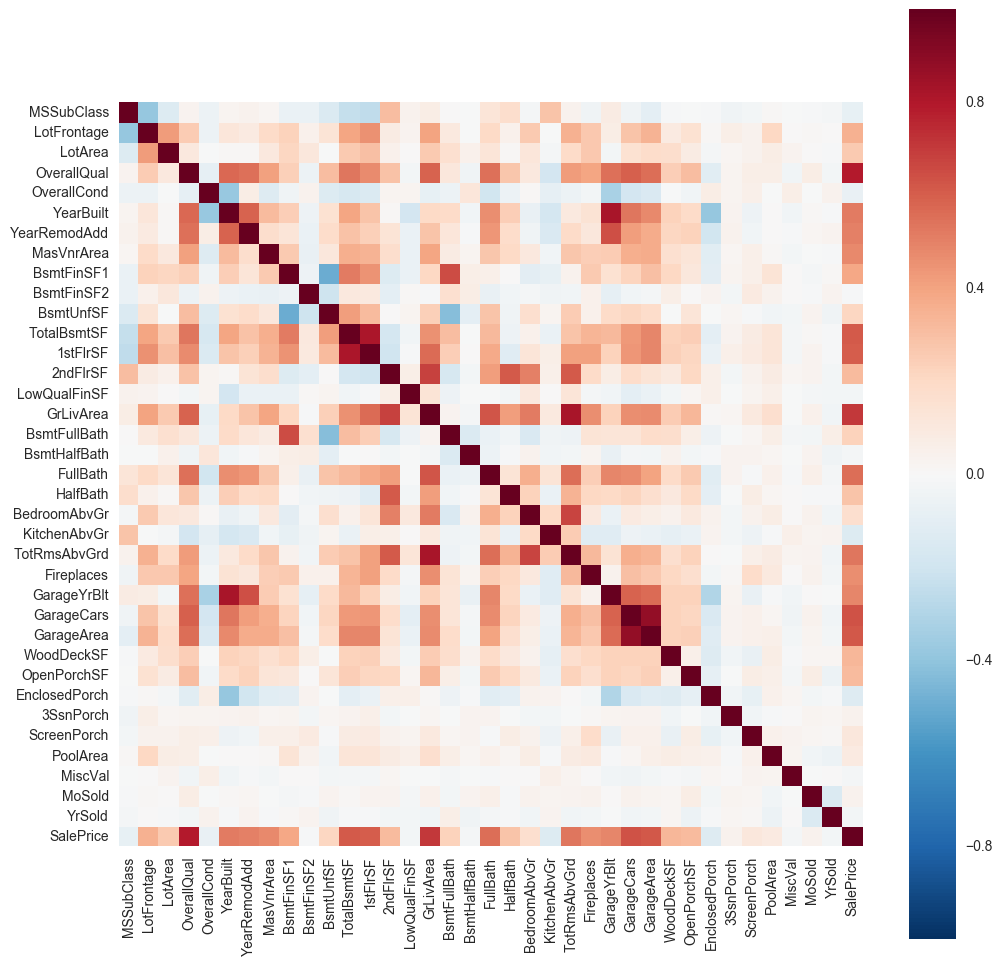

In [10]:
corr = ames_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
sns.plt

In [11]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.790971646739
GrLivArea: 	0.708584256389
GarageCars: 	0.640383308726
GarageArea: 	0.623384913038
TotalBsmtSF: 	0.613791532285
1stFlrSF: 	0.605970779941
FullBath: 	0.560604113108
TotRmsAbvGrd: 	0.533682199367
YearBuilt: 	0.522876912022
YearRemodAdd: 	0.507015099034
GarageYrBlt: 	0.486264369585
MasVnrArea: 	0.477410802037
Fireplaces: 	0.466827565809
BsmtFinSF1: 	0.386782893996
LotFrontage: 	0.351896380432
WoodDeckSF: 	0.32888080889
2ndFlrSF: 	0.319192983491
OpenPorchSF: 	0.315979580344
HalfBath: 	0.284626062633
LotArea: 	0.263842911565
BsmtFullBath: 	0.227551303799
BsmtUnfSF: 	0.214280506904
BedroomAbvGr: 	0.168272155796
KitchenAbvGr: 	-0.135978700432
EnclosedPorch: 	-0.128695108854
ScreenPorch: 	0.111378177949
PoolArea: 	0.0923894928294
MSSubClass: 	-0.0845630196621
OverallCond: 	-0.0777543847898
MoSold: 	0.046400930621
3SsnPorch: 	0.04455301874
YrSold: 	-0.0288844993565
LowQualFinSF: 	-0.02564

But some of those features are highly correlated with one another.

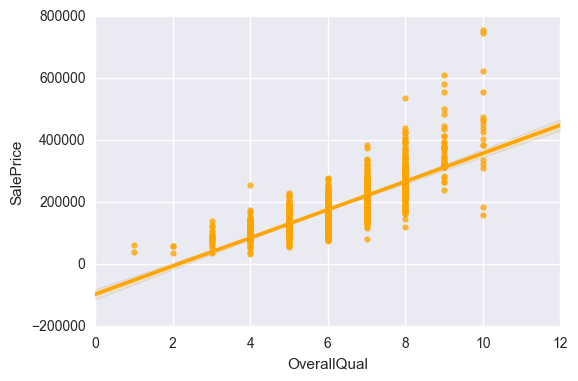

In [12]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = ames_train, color = 'Orange')

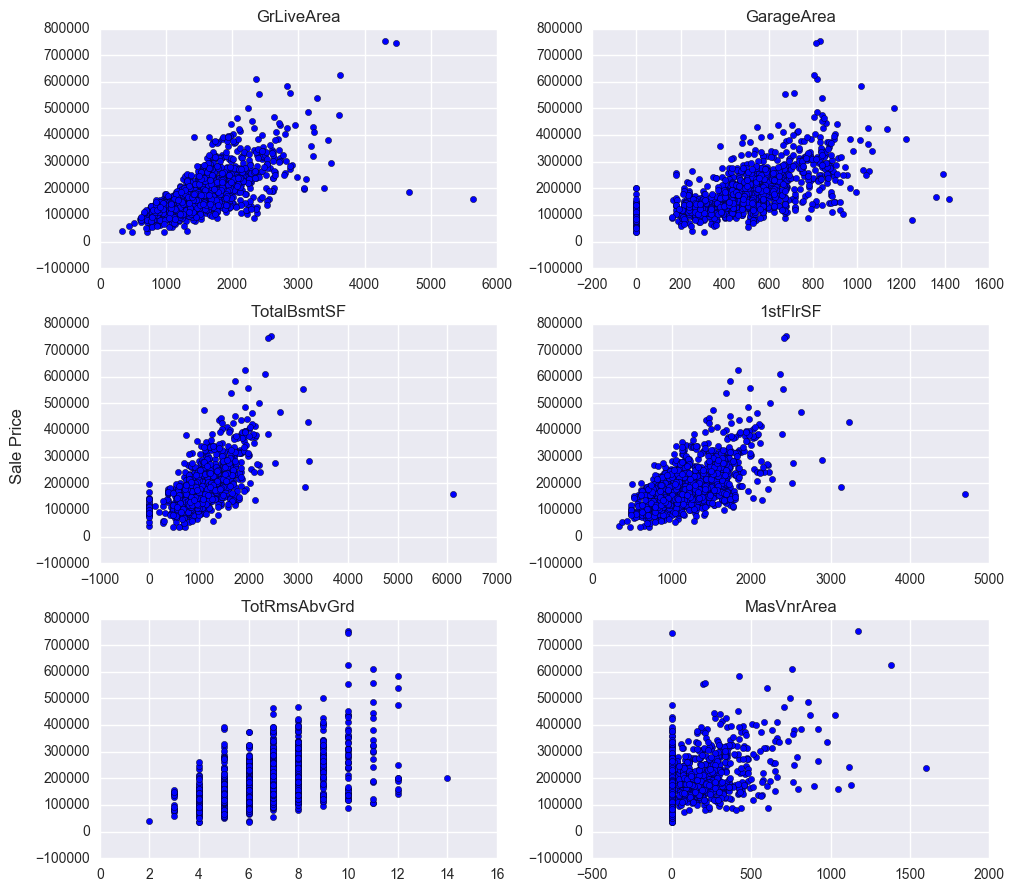

In [13]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = ames_train.SalePrice.values
axarr[0, 0].scatter(ames_train.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(ames_train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(ames_train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(ames_train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(ames_train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(ames_train.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

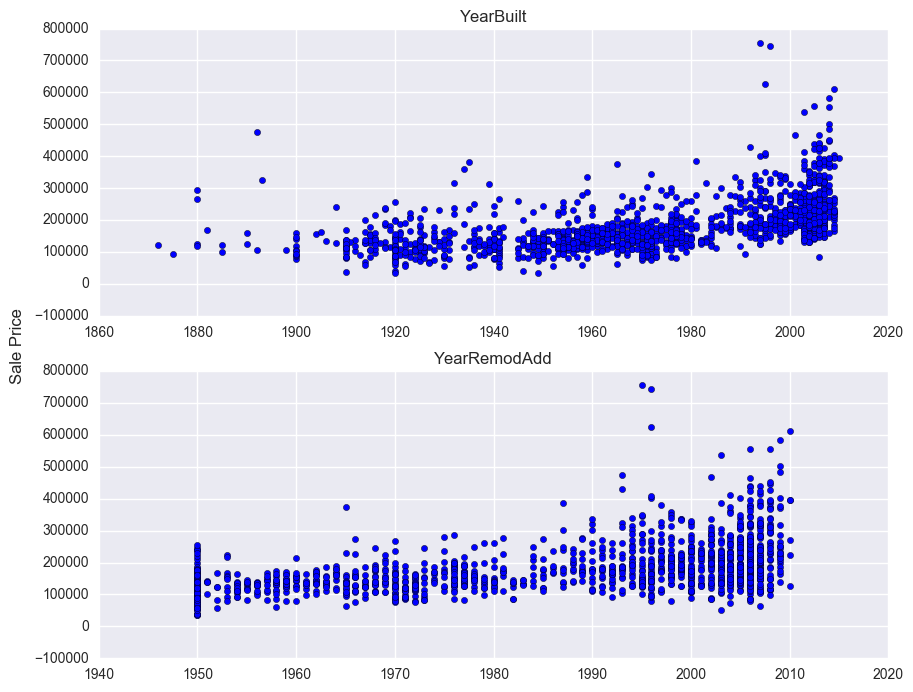

In [14]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
plt.scatter(ames_train.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(ames_train.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

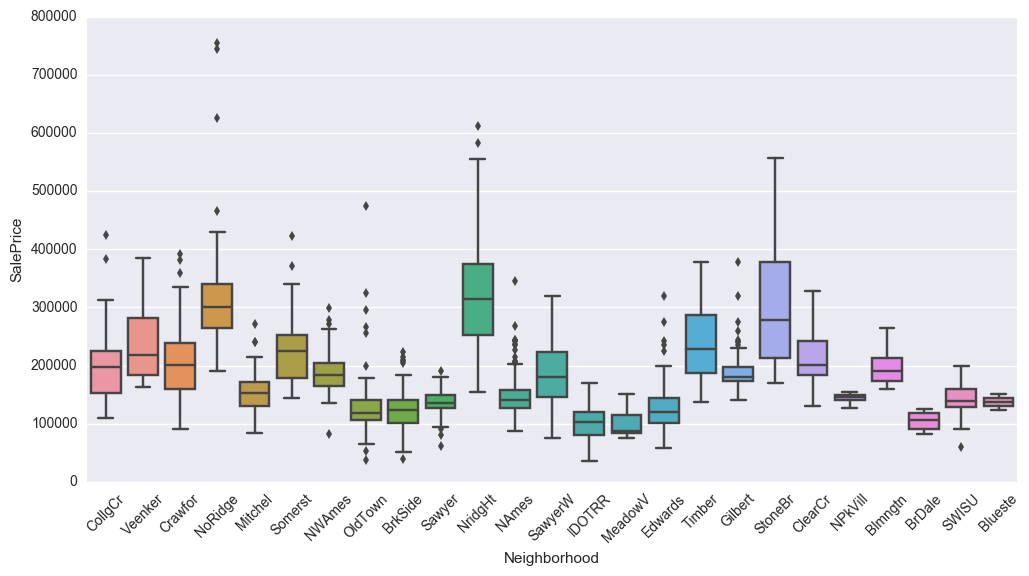

In [15]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = ames_train)
xt = plt.xticks(rotation=45)

Looks like NridgHt, StoneBr & NoRidge are amongst the more affluent neighborhoods, while BrkSide, IDOTRR and OldTown are among the poorest.

Home inventory varies with NAmes in the lead while rarely any properties are sold at Blueste (among the reported).

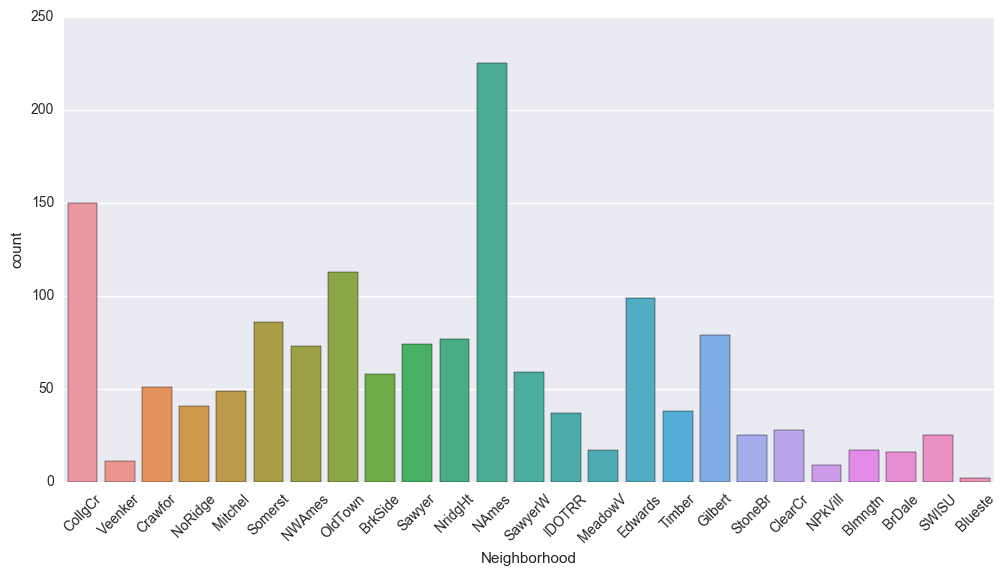

In [16]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = ames_train)
xt = plt.xticks(rotation=45)

## Housing Price vs Sales

#### Sale Type & Condition

#### Sales Seasonality

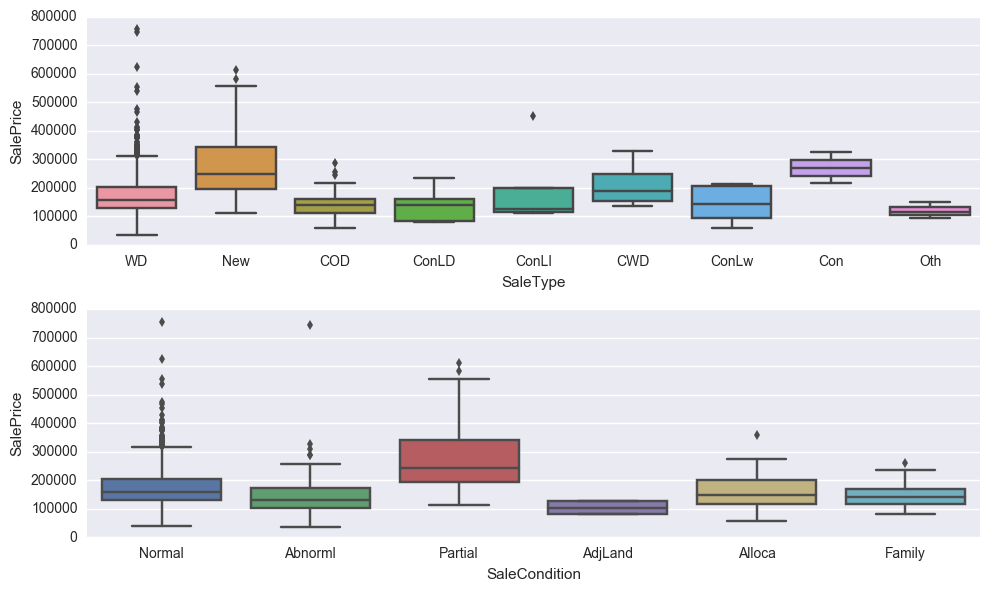

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = ames_train, ax = ax[1])
plt.tight_layout()

From the chart above we can see that a large number of the new homes constructed were above $200K.

Cash offers were between $100 - $200K. The mean of the offers with atleast 15% down were close to $300K. 

Court officer deed sales seemed to be a great deal for purchasers.

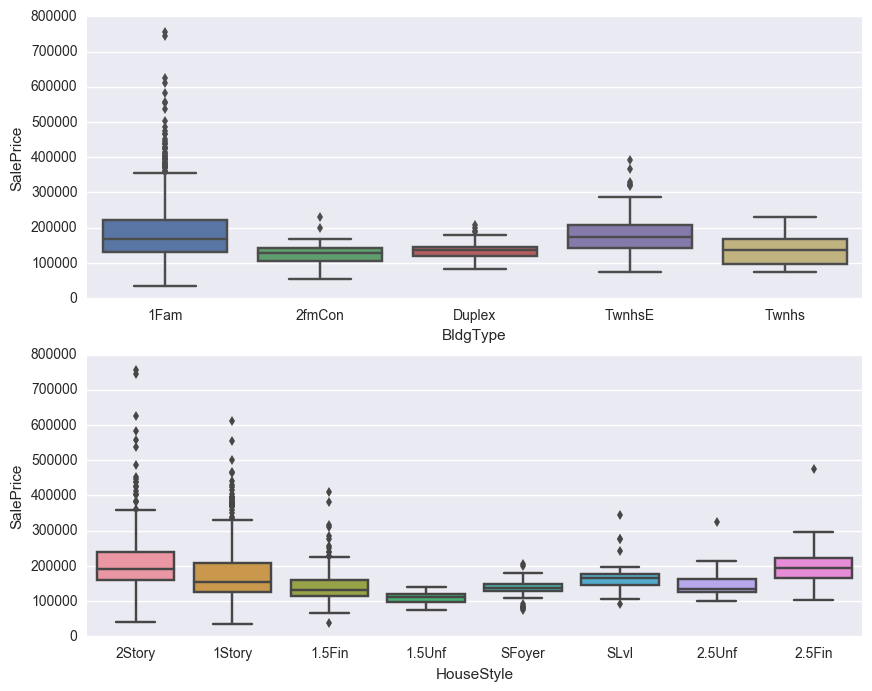

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = ames_train, ax = ax[1])

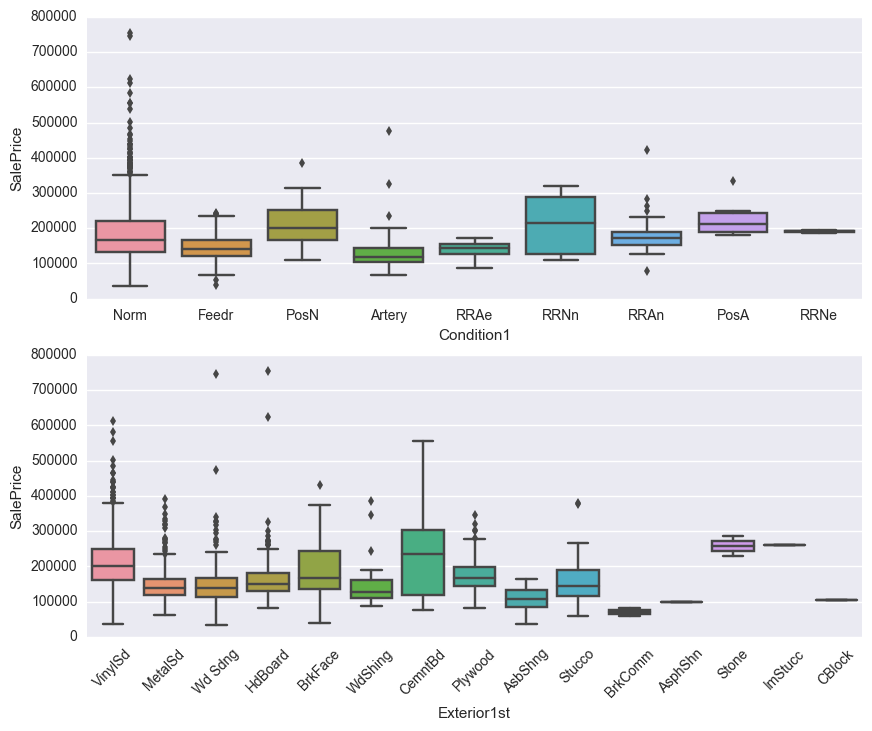

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = ames_train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

We see a pretty wide range (high variance) of sale prices `Within 200' of North-South Railroad` but stabitlity in the `Within 200' of East-West Railroad`. This likely suggests both good & bad neighborhoods fall North-South vs more affulent neighborhoods East to West.

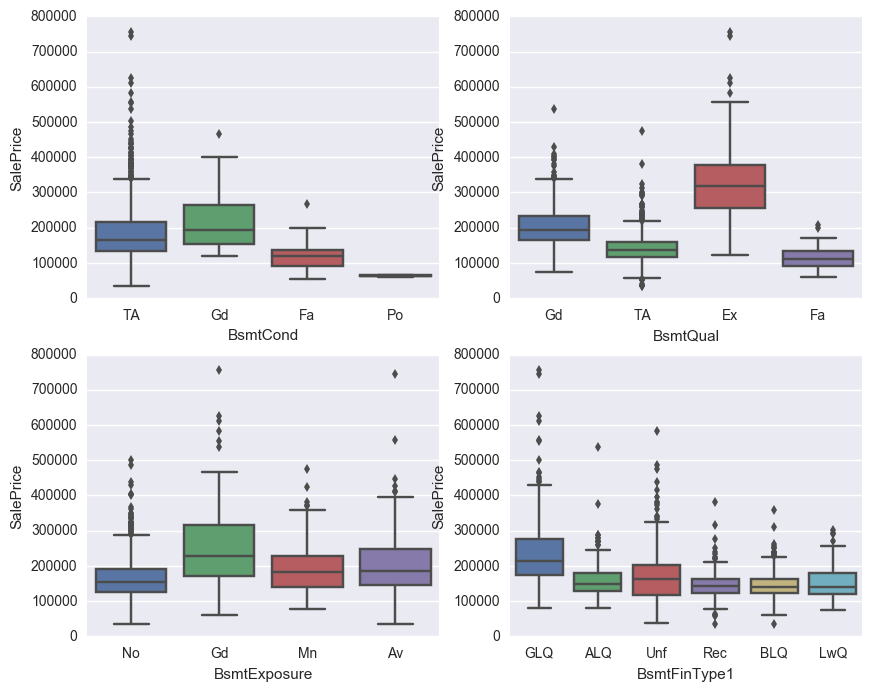

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = ames_train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = ames_train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = ames_train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = ames_train, ax = ax[1, 1])

In [21]:
pd.crosstab(ames_train.HeatingQC, ames_train.CentralAir)

CentralAir   N    Y
HeatingQC          
Ex           8  733
Fa          24   25
Gd          13  227
Po           1    0
TA          49  379

In [22]:
pd.crosstab(ames_train.HeatingQC, ames_train.FireplaceQu)

FireplaceQu  Ex  Fa   Gd  Po   TA
HeatingQC                        
Ex           22  14  254   4  160
Fa            0   1   13   1    5
Gd            2   3   45   5   57
TA            0  15   68  10   91

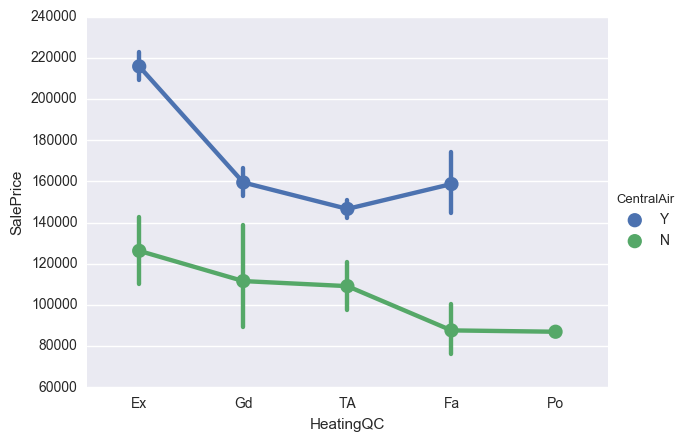

In [23]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = ames_train, 
             size = 4.5, aspect = 1.4)

Central Air is correlated with higher prices.

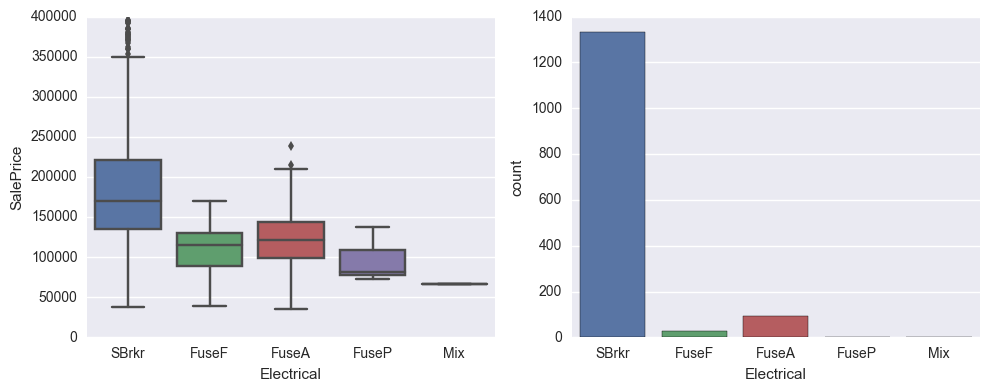

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = ames_train, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = ames_train)
plt.tight_layout()

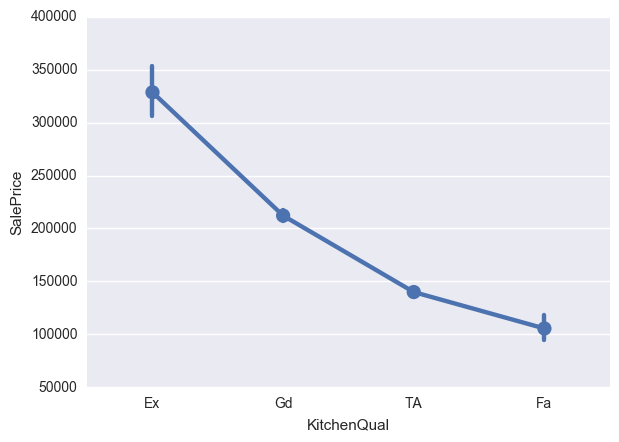

In [25]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = ames_train, order = ['Ex', 'Gd', 'TA', 'Fa'])

Kitchen quality correlates with higher prices, not surprised!

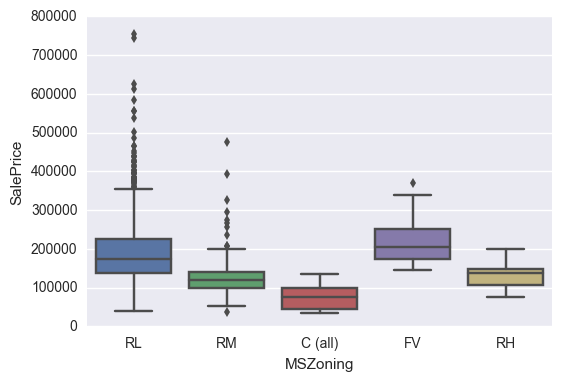

In [26]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = ames_train)

Turns out most people prefer not to live next to commercial properties, hence lower sale prices. The top in demand zoning classifications are floating villages & low density residential zones.

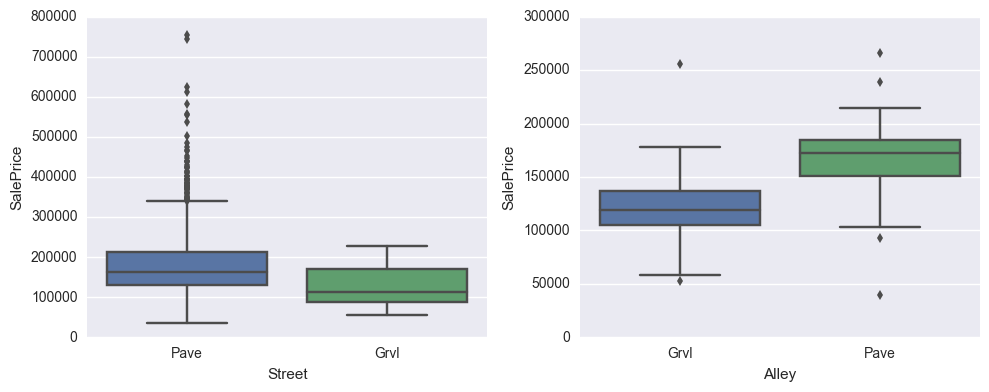

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = ames_train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = ames_train, ax = ax[1])
plt.tight_layout()

Not surprising that pavement is more desirable than gravel when type of road access to property is an Alley. 

In [28]:
correlations = ames_test.corr(method='pearson')
print(correlations)

                      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id             1.000e+00       0.005        0.010    0.051       -0.065        0.010     -0.059   
MSSubClass     4.993e-03       1.000       -0.451   -0.360        0.035       -0.072      0.041   
LotFrontage    9.930e-03      -0.451        1.000    0.645        0.183       -0.092      0.122   
LotArea        5.149e-02      -0.360        0.645    1.000        0.108       -0.103      0.048   
OverallQual   -6.489e-02       0.035        0.183    0.108        1.000       -0.096      0.622   
OverallCond    9.553e-03      -0.072       -0.092   -0.103       -0.096        1.000     -0.361   
YearBuilt     -5.865e-02       0.041        0.122    0.048        0.622       -0.361      1.000   
YearRemodAdd  -7.944e-02       0.046        0.093    0.037        0.591        0.022      0.632   
MasVnrArea    -2.142e-02      -0.012        0.252    0.189        0.454       -0.144      0.312   
BsmtFinSF1

## Skew of Univariate Distributions

Positive (right skew)

Zero (no skew)

Negative (left skew)

Both in & out of time datasets seem to have similar skew properties.

In [29]:
# positive (right), zero show less skew and negative (left) skew
skew = ames_train.skew()
print(skew)

Id                0.000
MSSubClass        1.407
LotFrontage       2.163
LotArea          12.203
OverallQual       0.216
OverallCond       0.694
YearBuilt        -0.614
YearRemodAdd     -0.505
MasVnrArea        2.668
BsmtFinSF1        1.687
BsmtFinSF2        4.265
BsmtUnfSF         0.919
TotalBsmtSF       1.525
1stFlrSF          1.377
2ndFlrSF          0.812
LowQualFinSF      9.008
GrLivArea         1.366
BsmtFullBath      0.598
BsmtHalfBath      4.102
FullBath          0.035
HalfBath          0.678
BedroomAbvGr      0.212
KitchenAbvGr      4.487
TotRmsAbvGrd      0.676
Fireplaces        0.649
GarageYrBlt      -0.650
GarageCars       -0.344
GarageArea        0.179
WoodDeckSF        1.499
OpenPorchSF       2.364
EnclosedPorch     3.089
3SsnPorch        10.301
ScreenPorch       4.121
PoolArea         14.823
MiscVal          24.468
MoSold            0.212
YrSold            0.097
SalePrice         1.882
dtype: float64


In [30]:
skew = ames_test.skew()
print(skew)

Id                0.000
MSSubClass        1.347
LotFrontage       0.662
LotArea           3.115
OverallQual       0.181
OverallCond       0.449
YearBuilt        -0.588
YearRemodAdd     -0.400
MasVnrArea        2.533
BsmtFinSF1        1.166
BsmtFinSF2        4.041
BsmtUnfSF         0.920
TotalBsmtSF       0.814
1stFlrSF          1.558
2ndFlrSF          0.913
LowQualFinSF     16.167
GrLivArea         1.130
BsmtFullBath      0.650
BsmtHalfBath      3.780
FullBath          0.296
HalfBath          0.715
BedroomAbvGr      0.437
KitchenAbvGr      4.079
TotRmsAbvGrd      0.843
Fireplaces        0.820
GarageYrBlt      -0.158
GarageCars       -0.107
GarageArea        0.300
WoodDeckSF        2.131
OpenPorchSF       2.688
EnclosedPorch     4.669
3SsnPorch        12.524
ScreenPorch       3.788
PoolArea         20.197
MiscVal          20.075
MoSold            0.183
YrSold            0.169
dtype: float64


## Data Visualizations

### Univariate Plots

Univariate plot distributions seem to be similar between in and out of time sets.

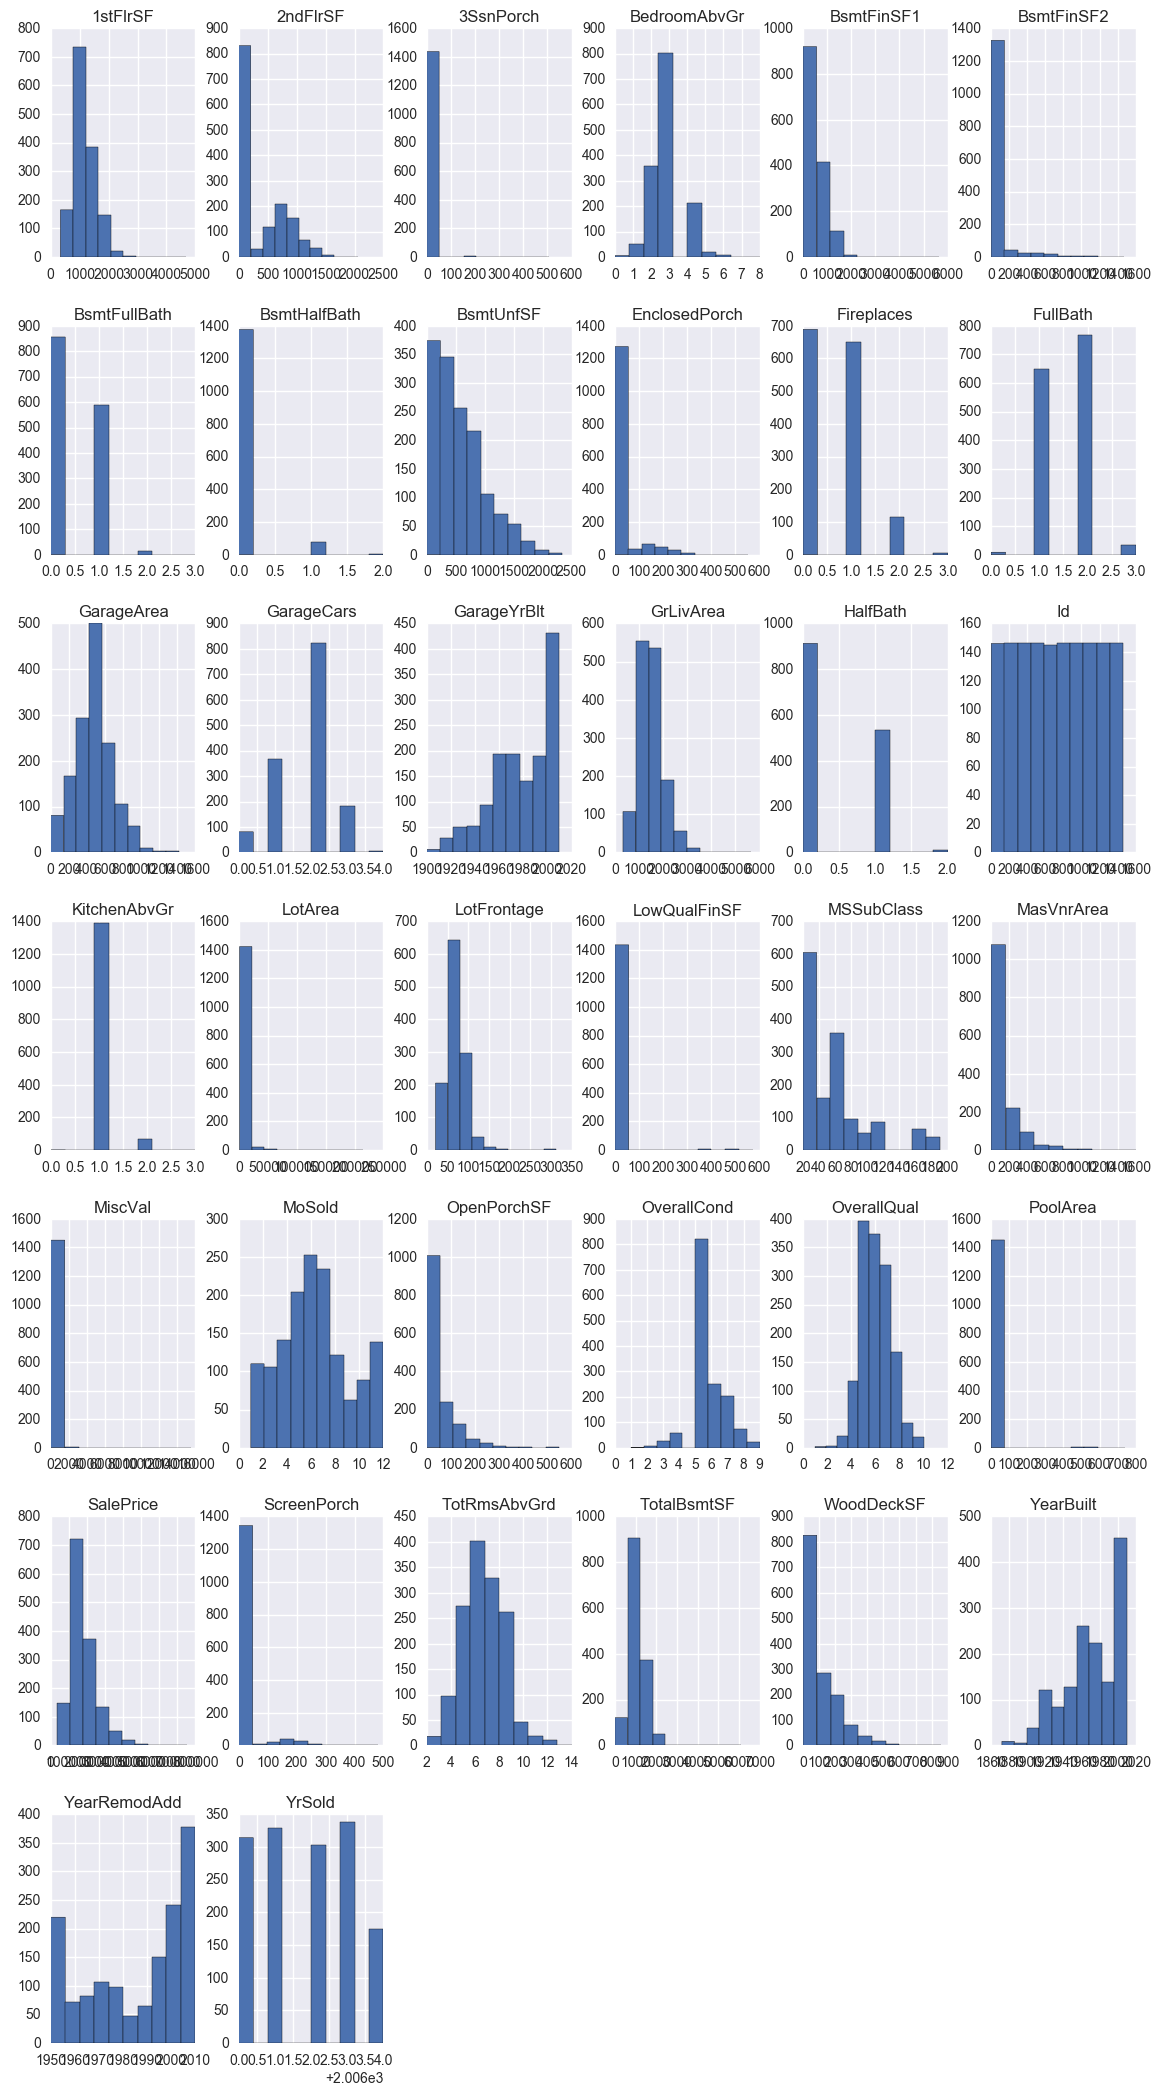

In [31]:
# training set
ames_train.hist(figsize=(14, 26))
plt.show() 

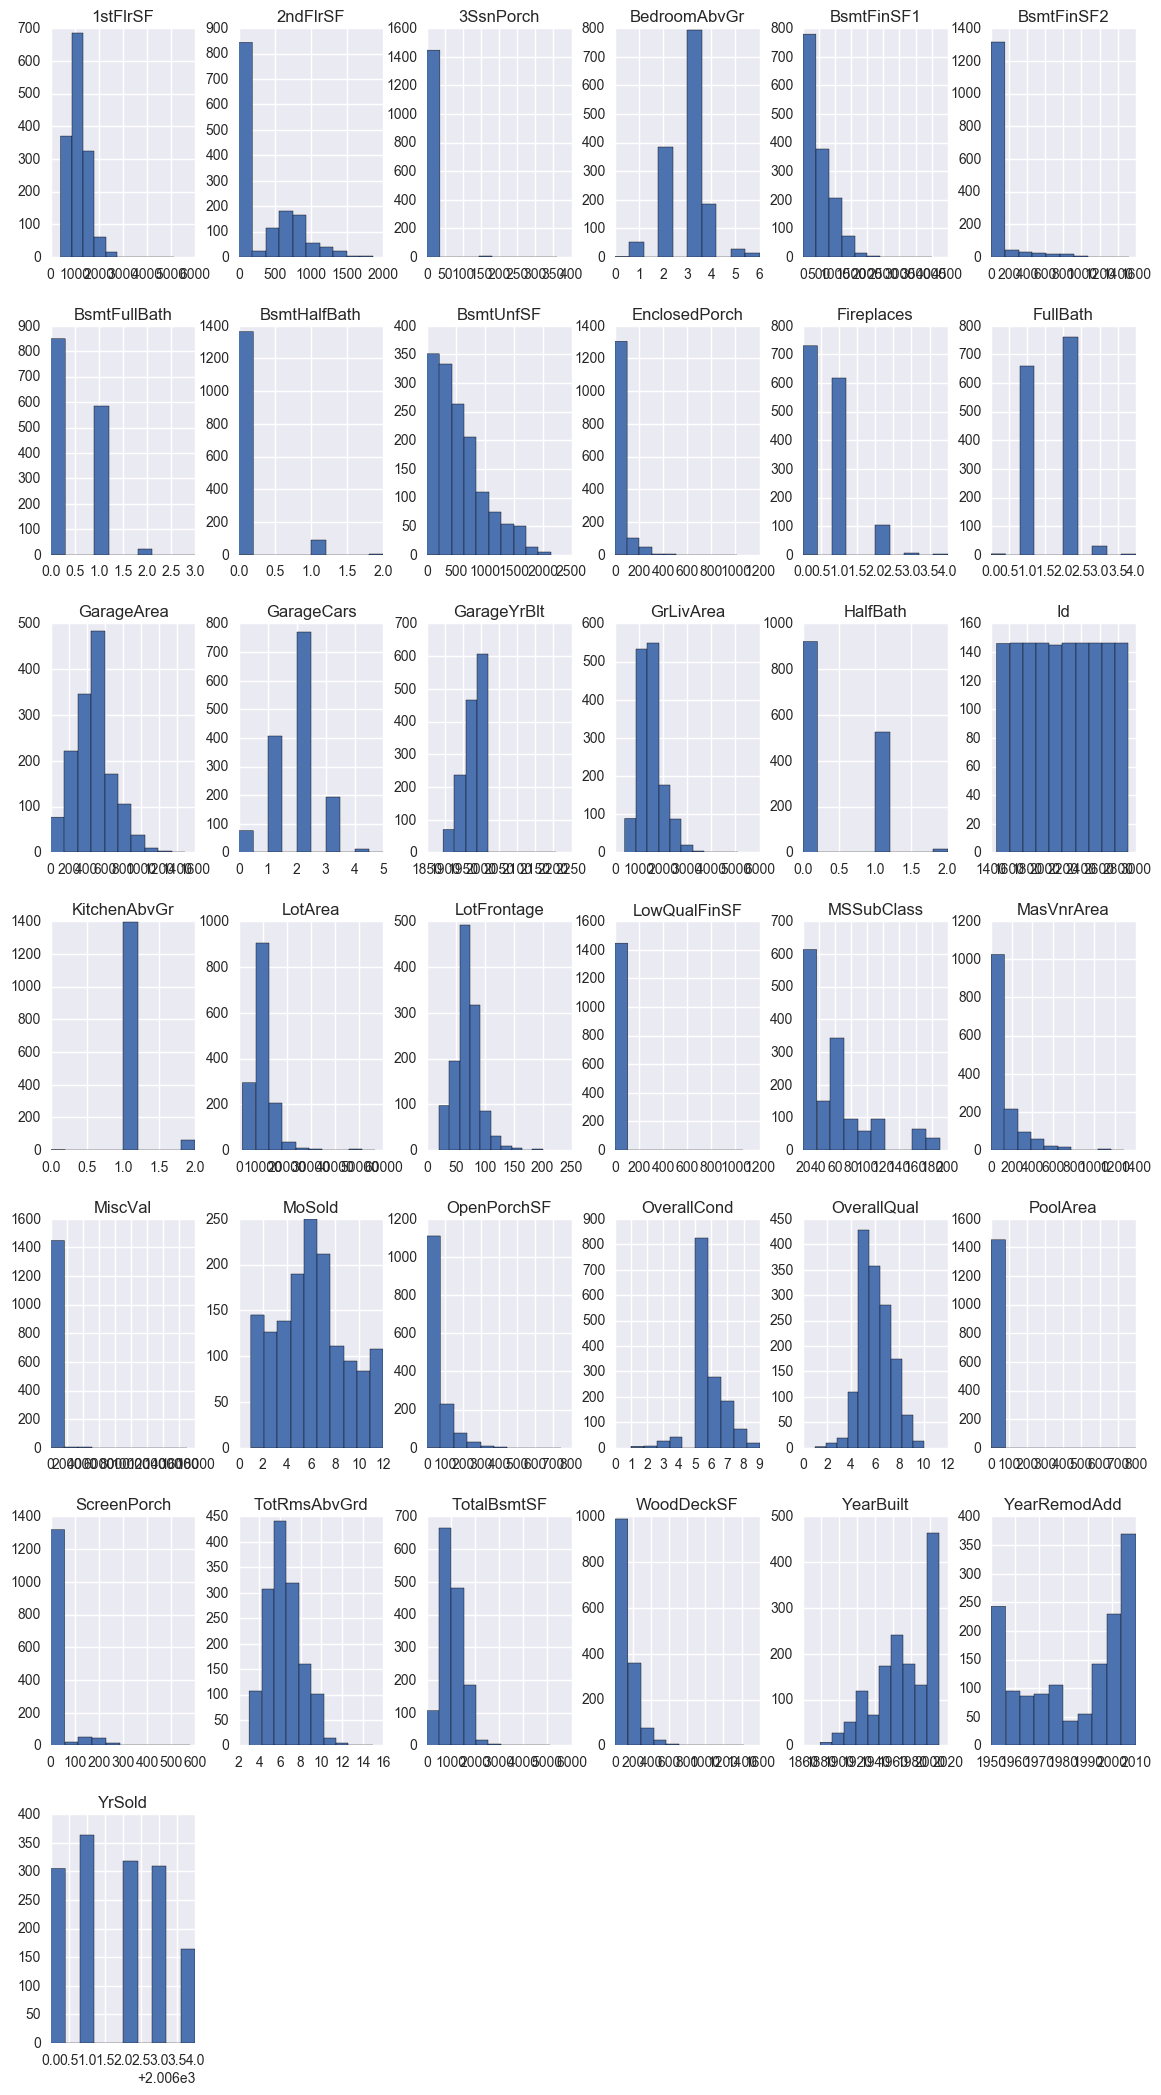

In [32]:
# hold out set
ames_test.hist(figsize=(14, 26))
plt.show() 

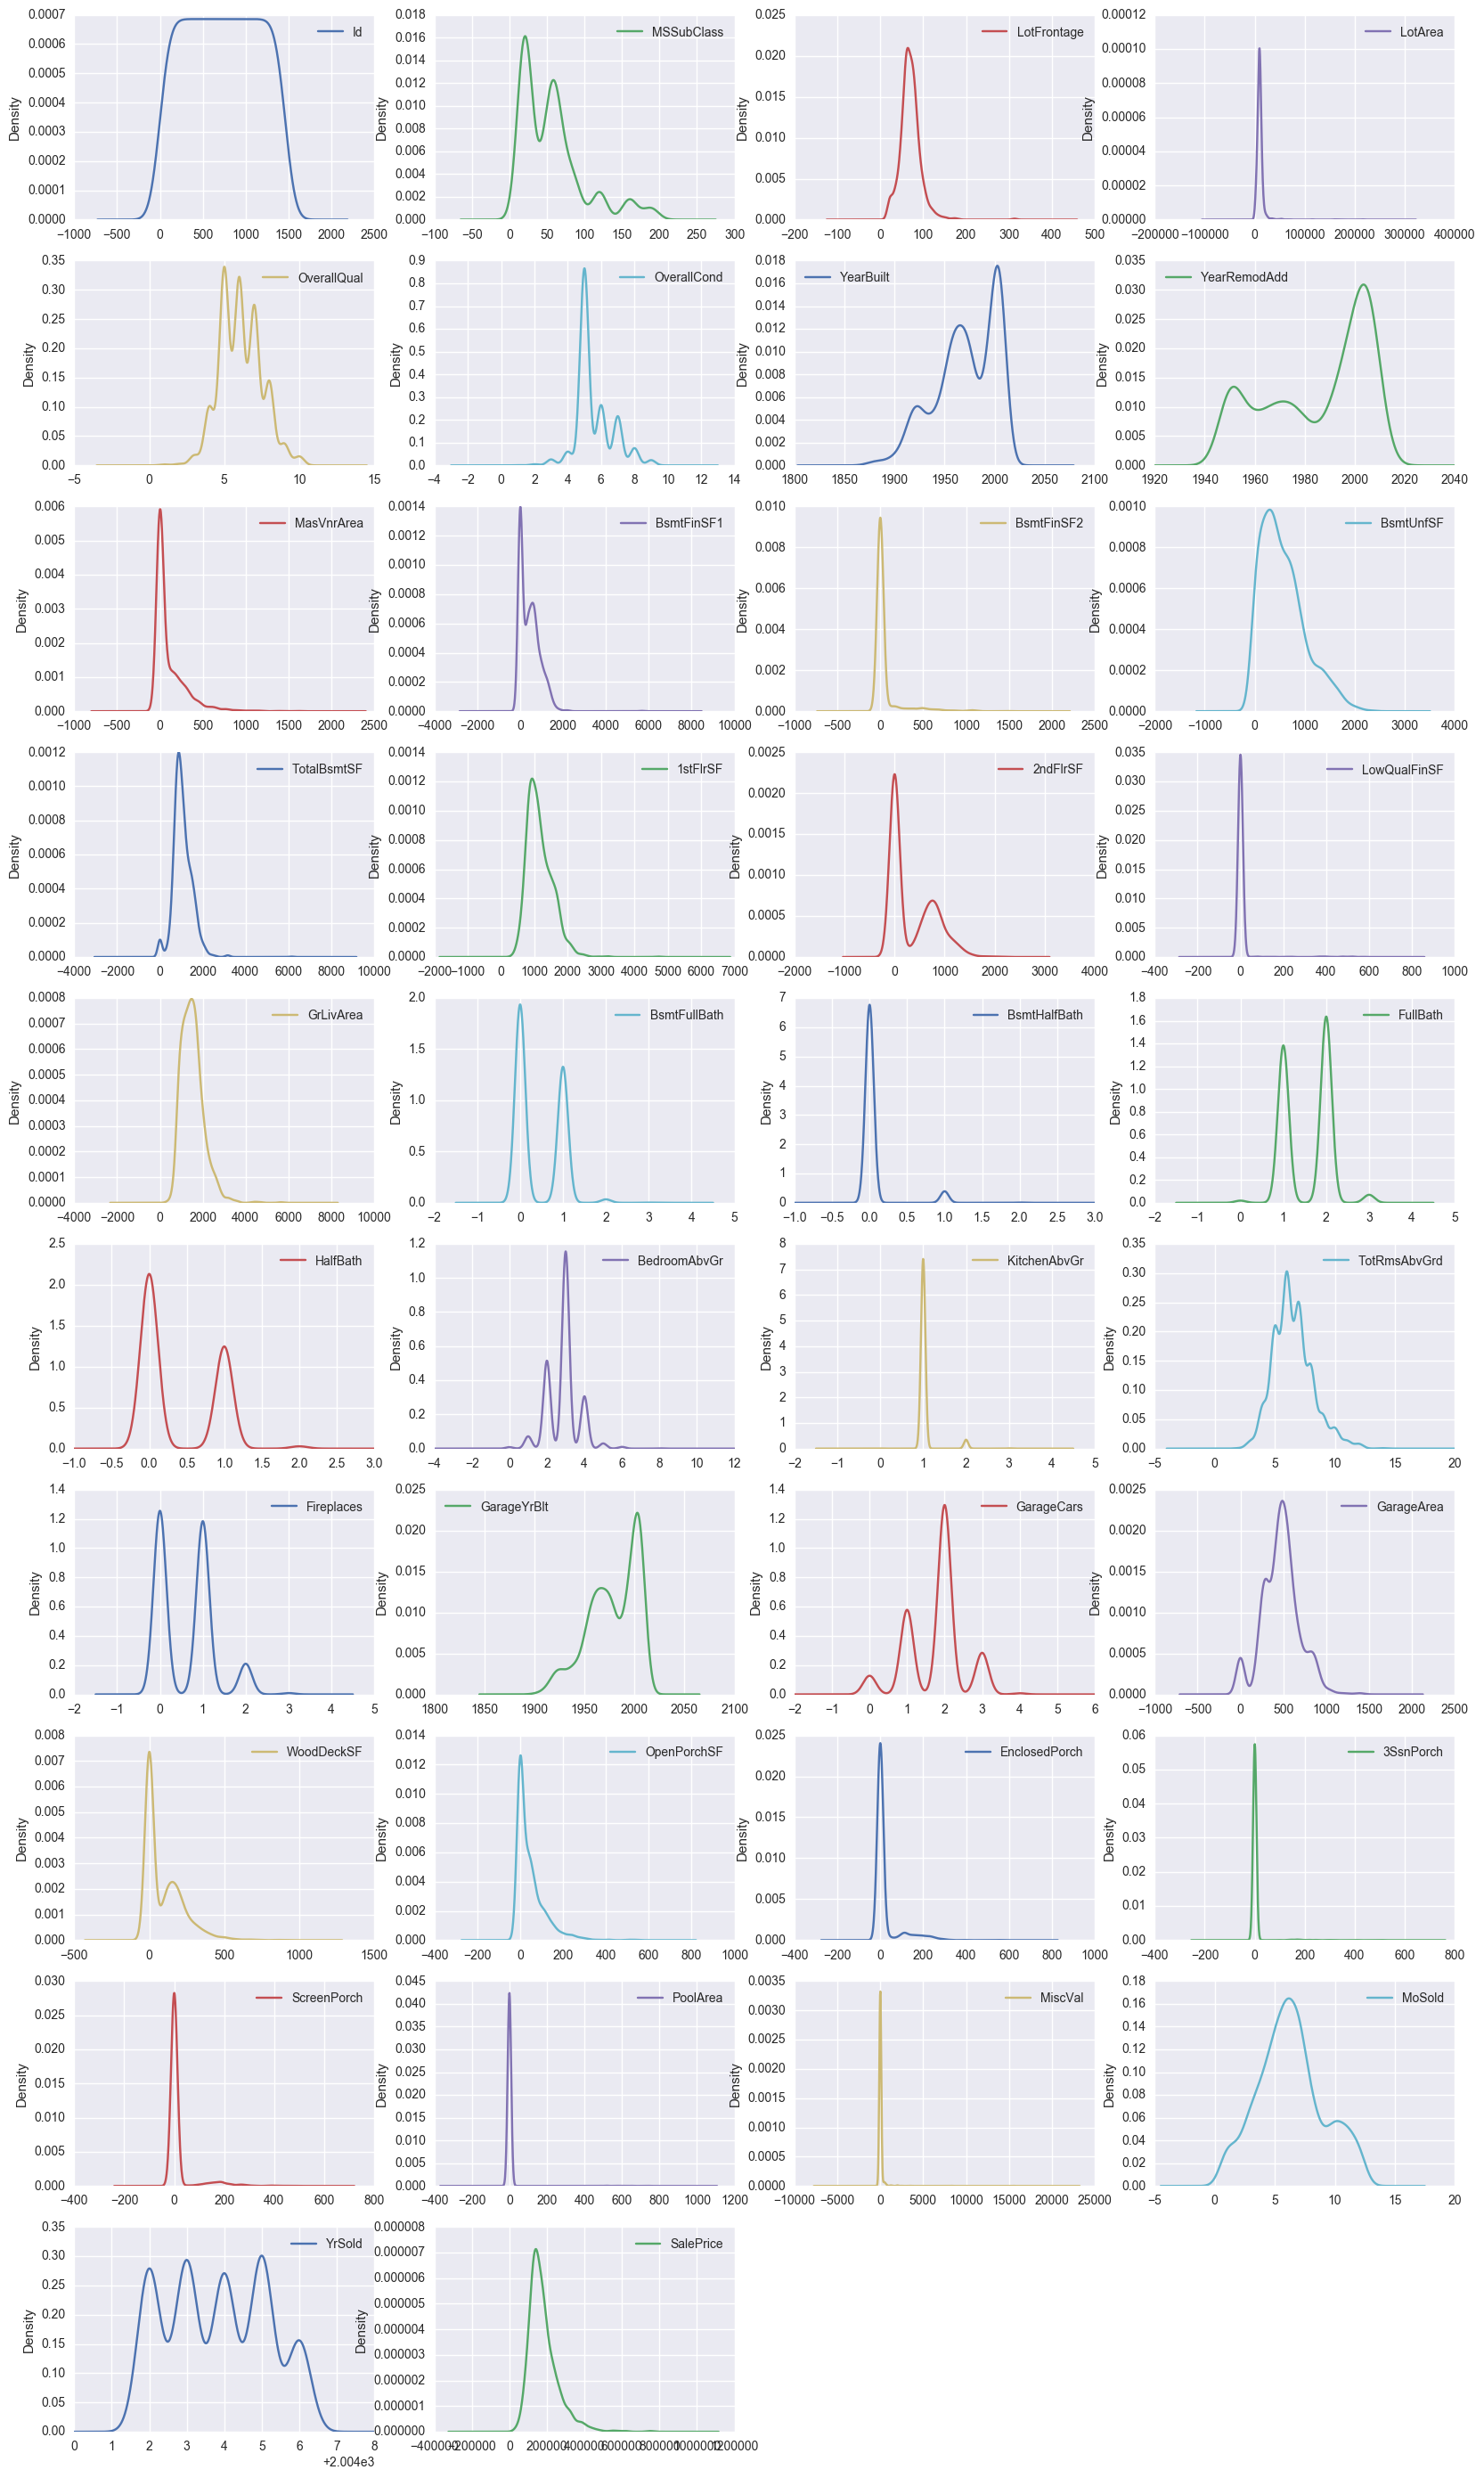

In [33]:
ames_train.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

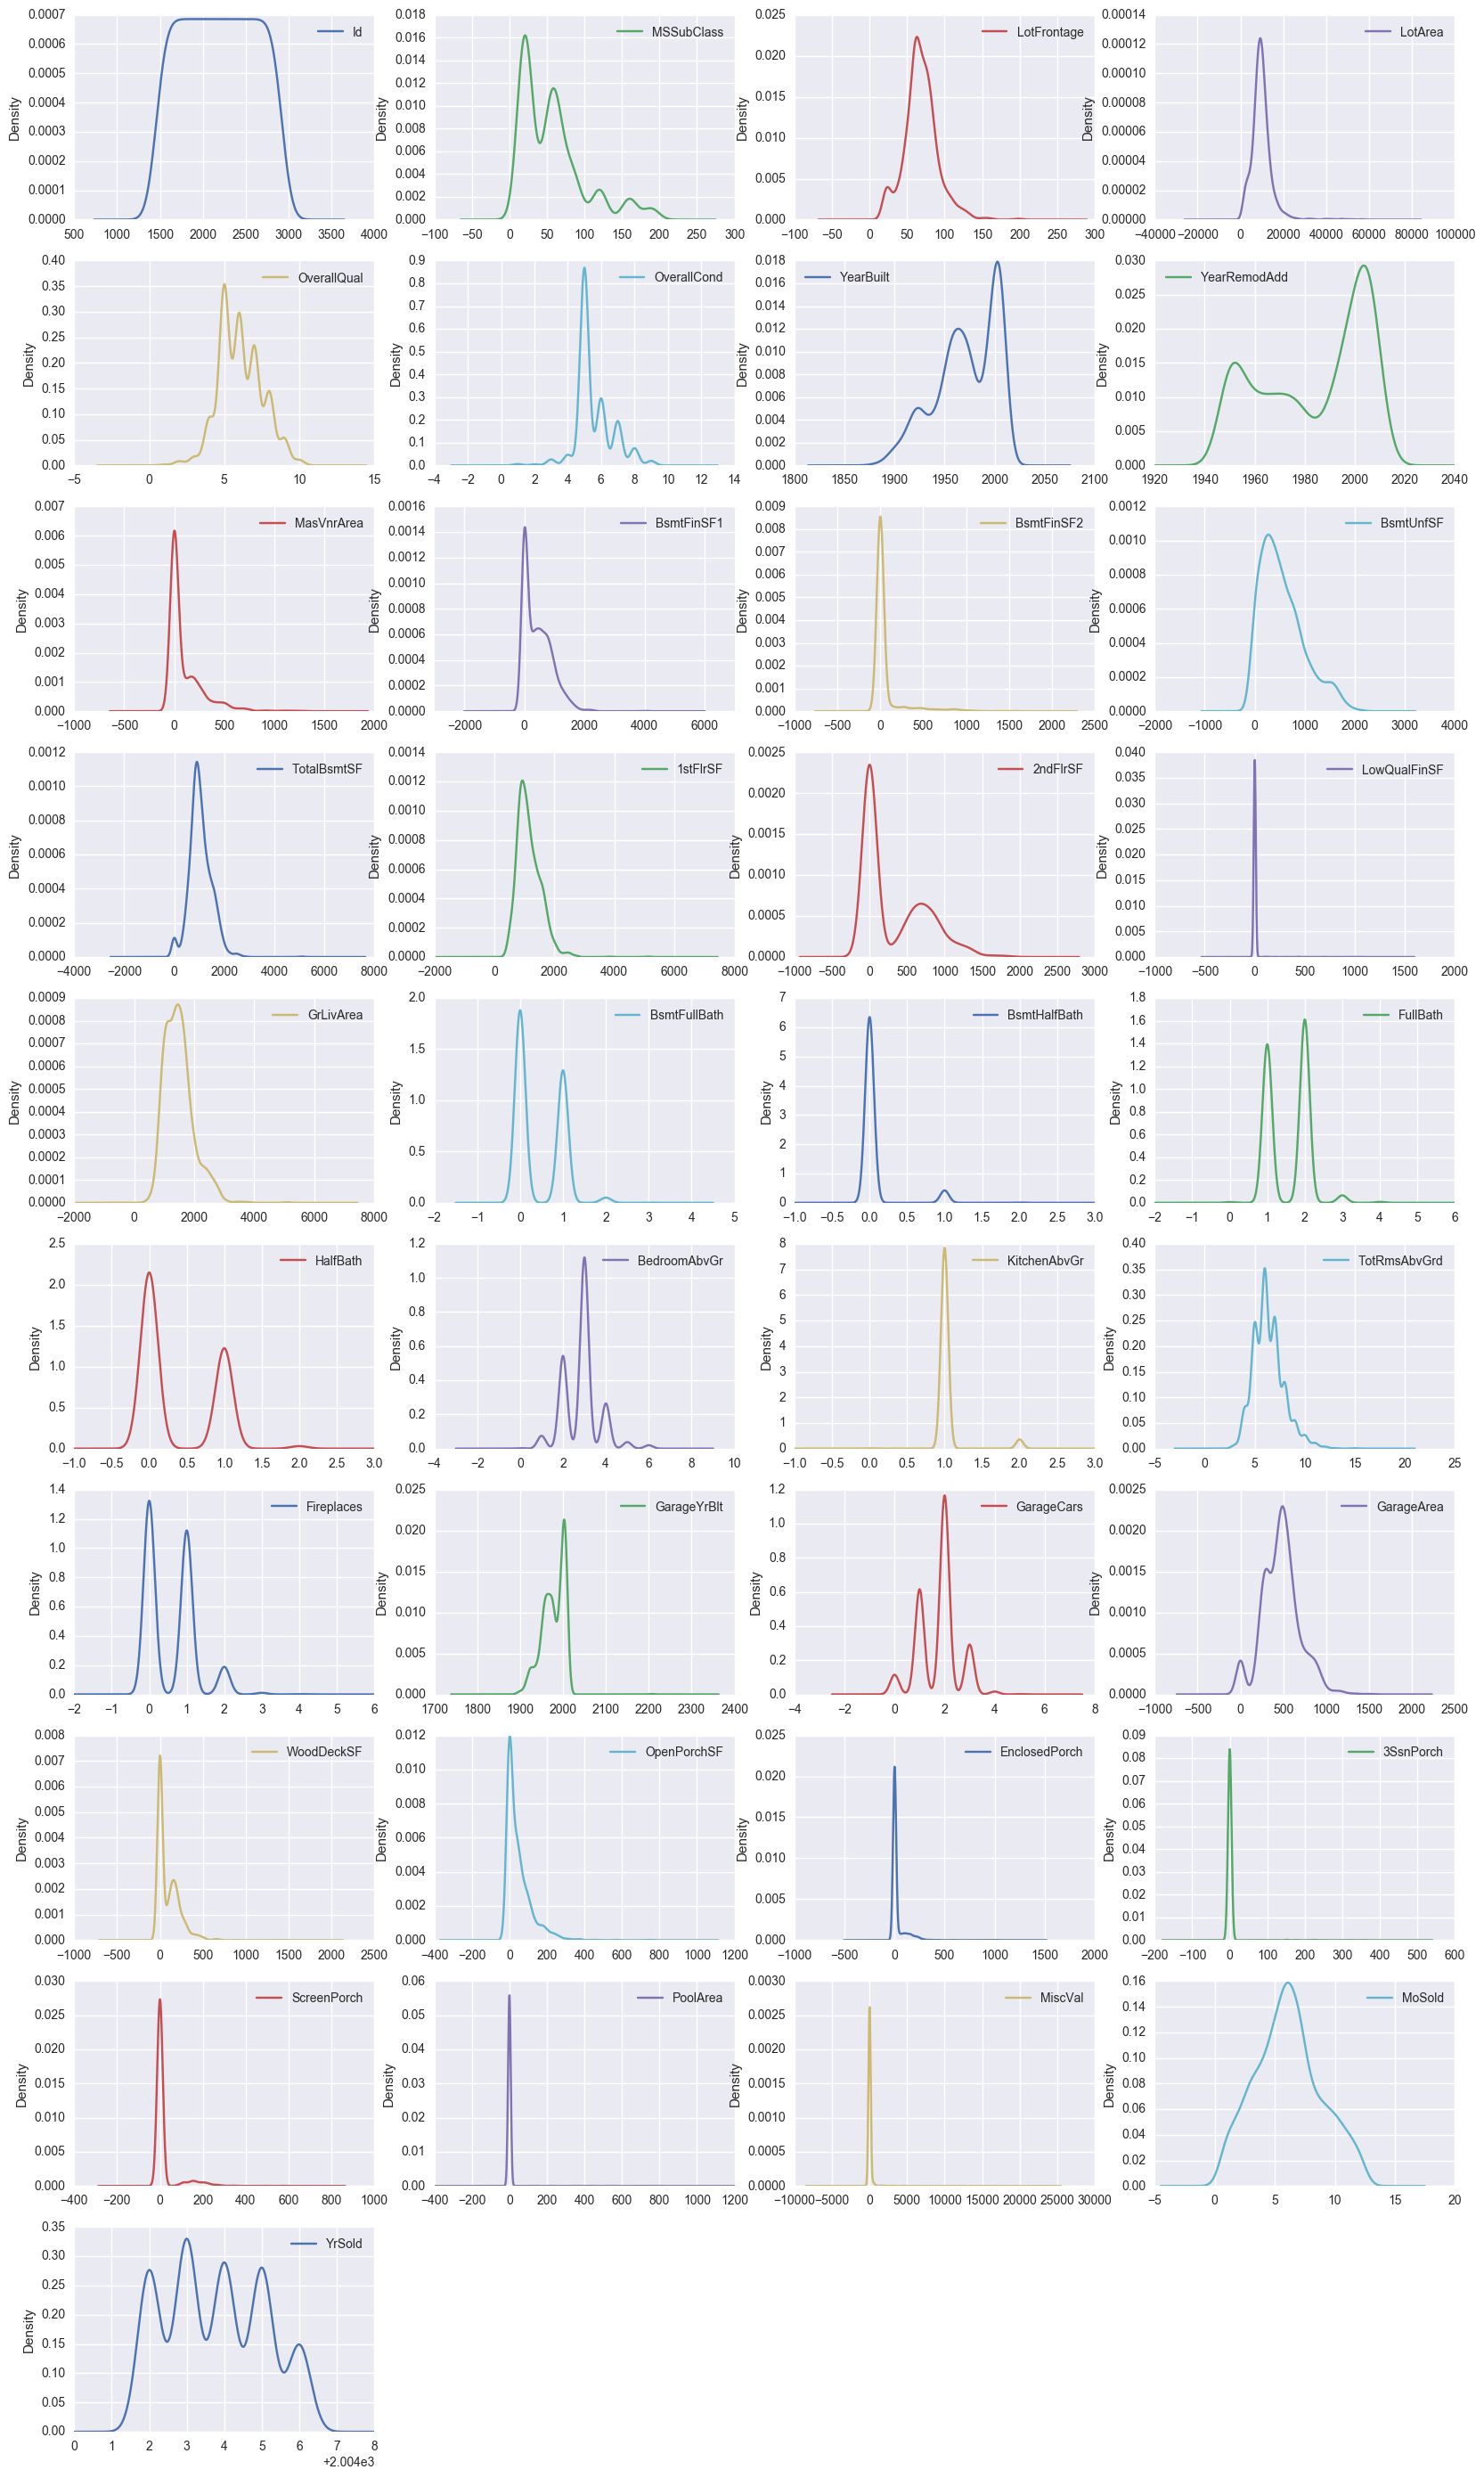

In [34]:
ames_test.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

### Box and Whisker Plots

summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

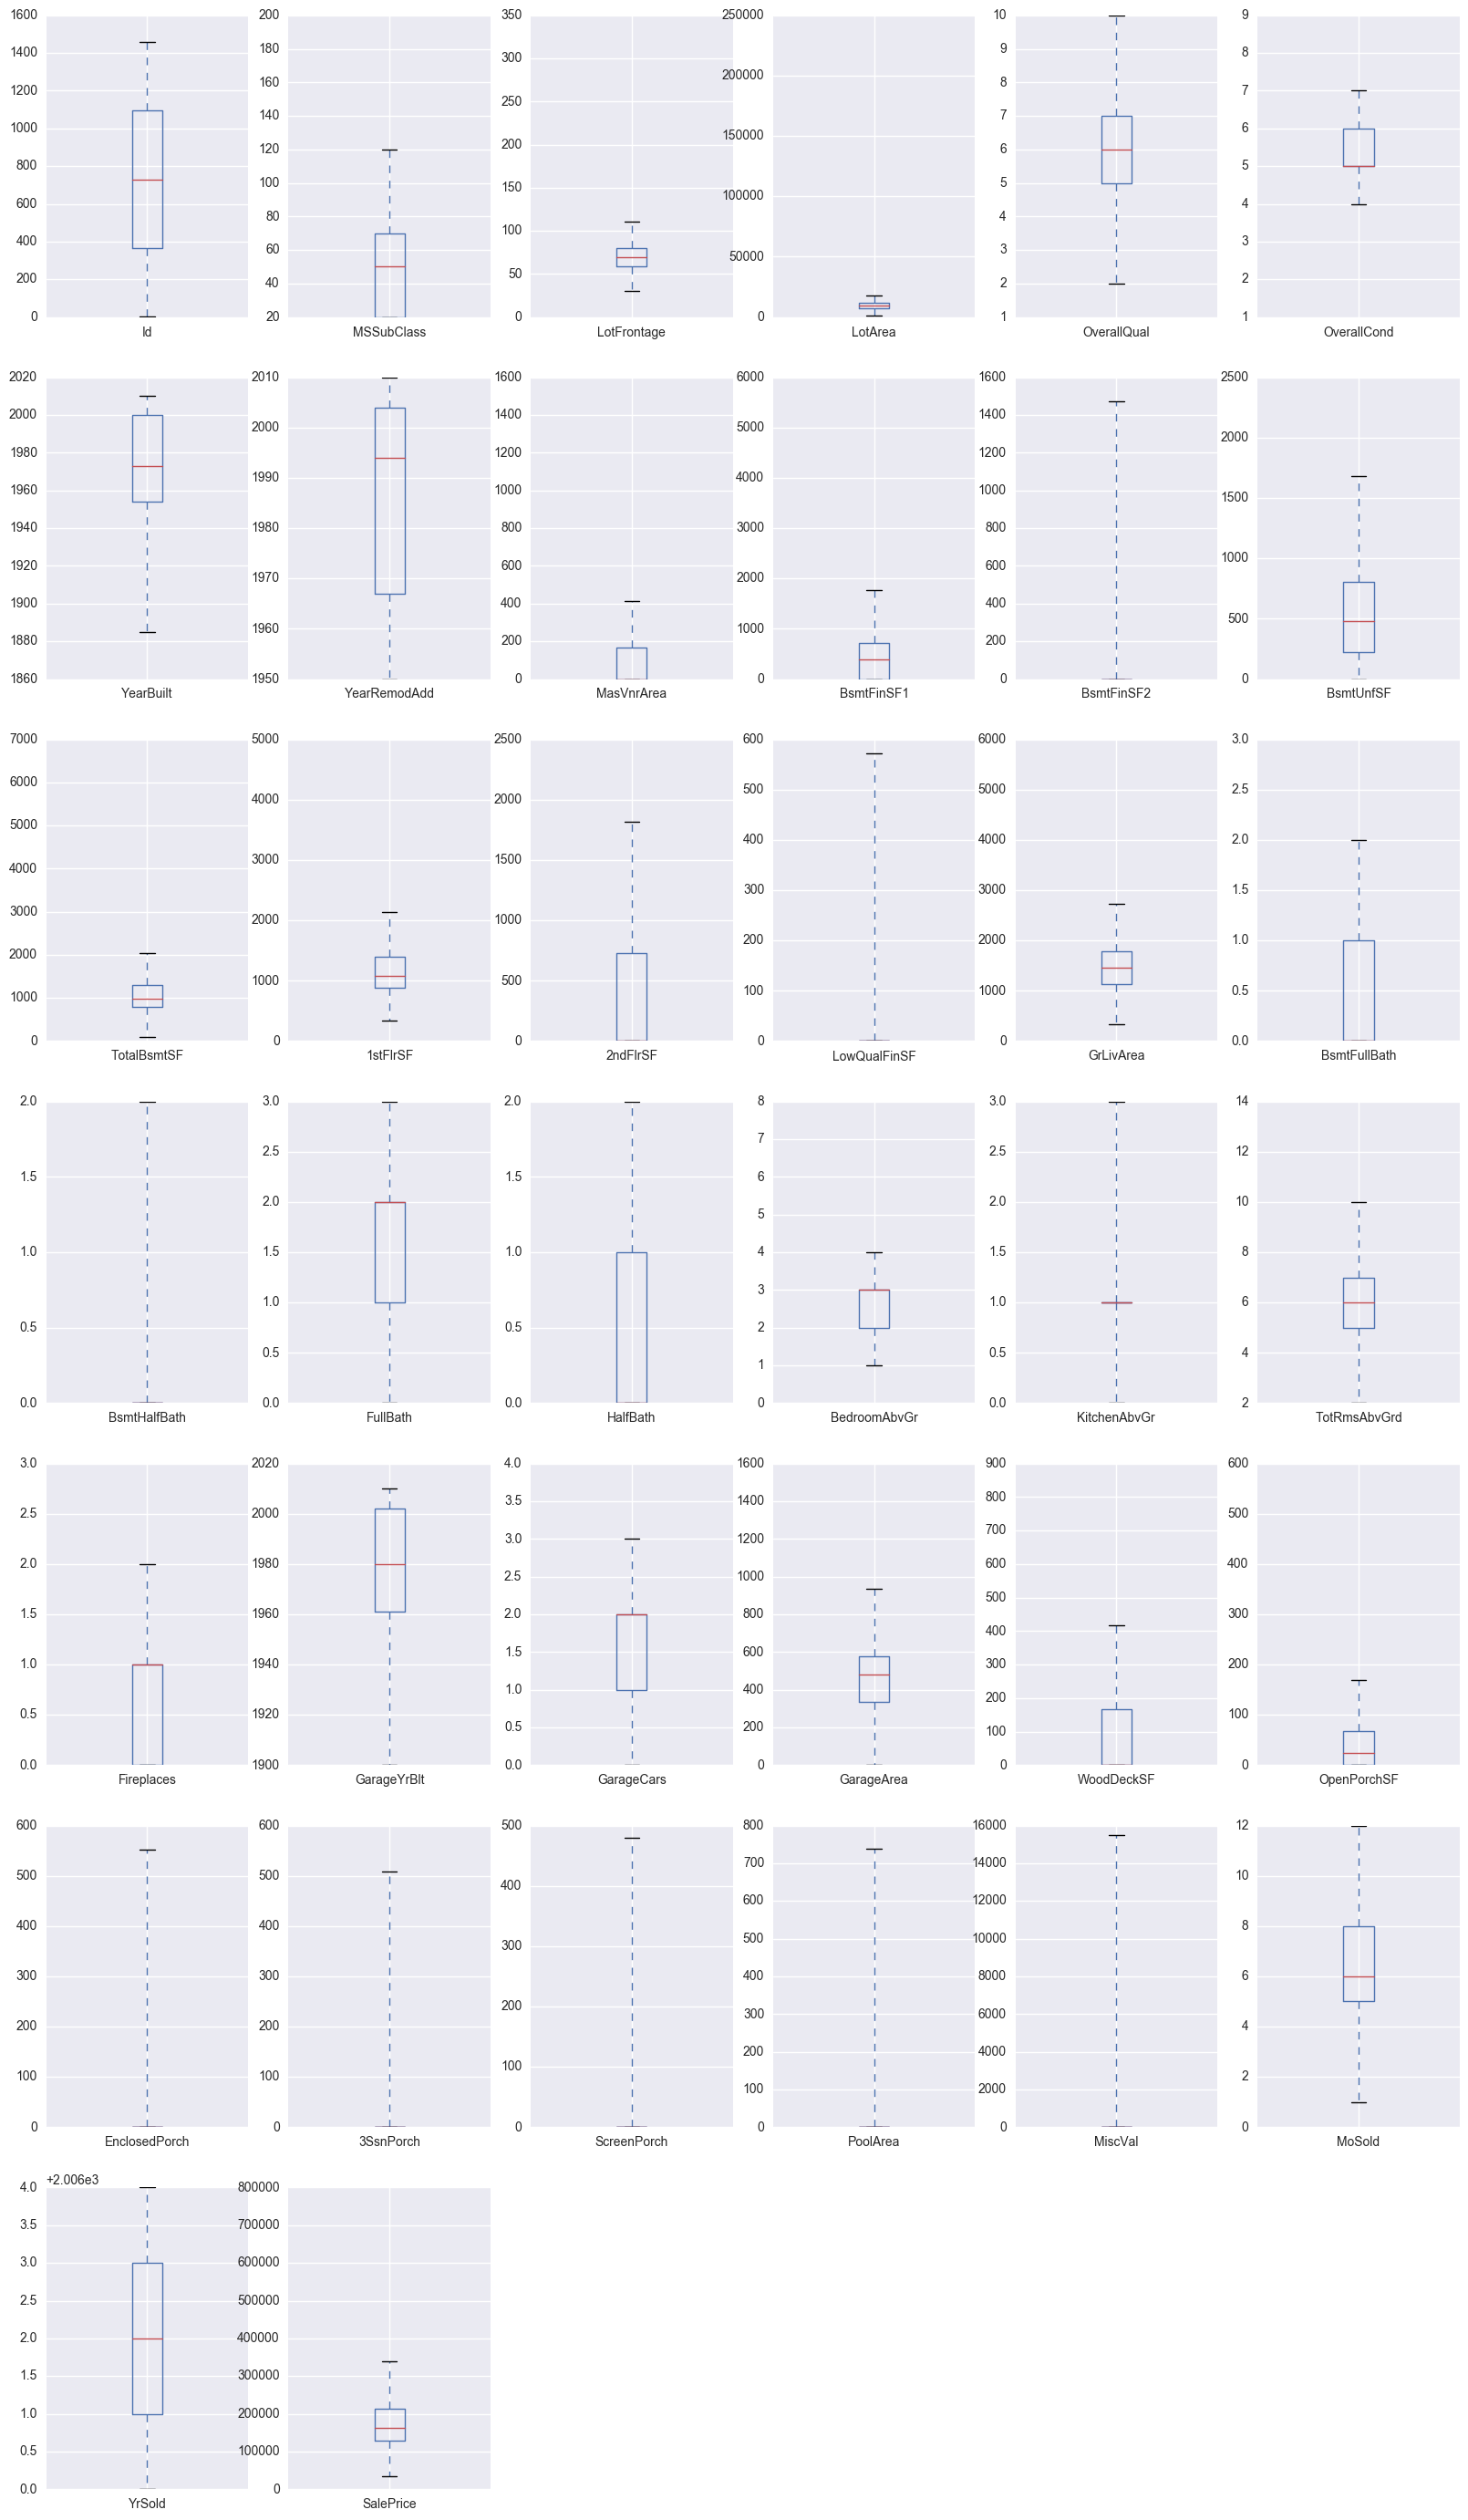

In [35]:
ames_train.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

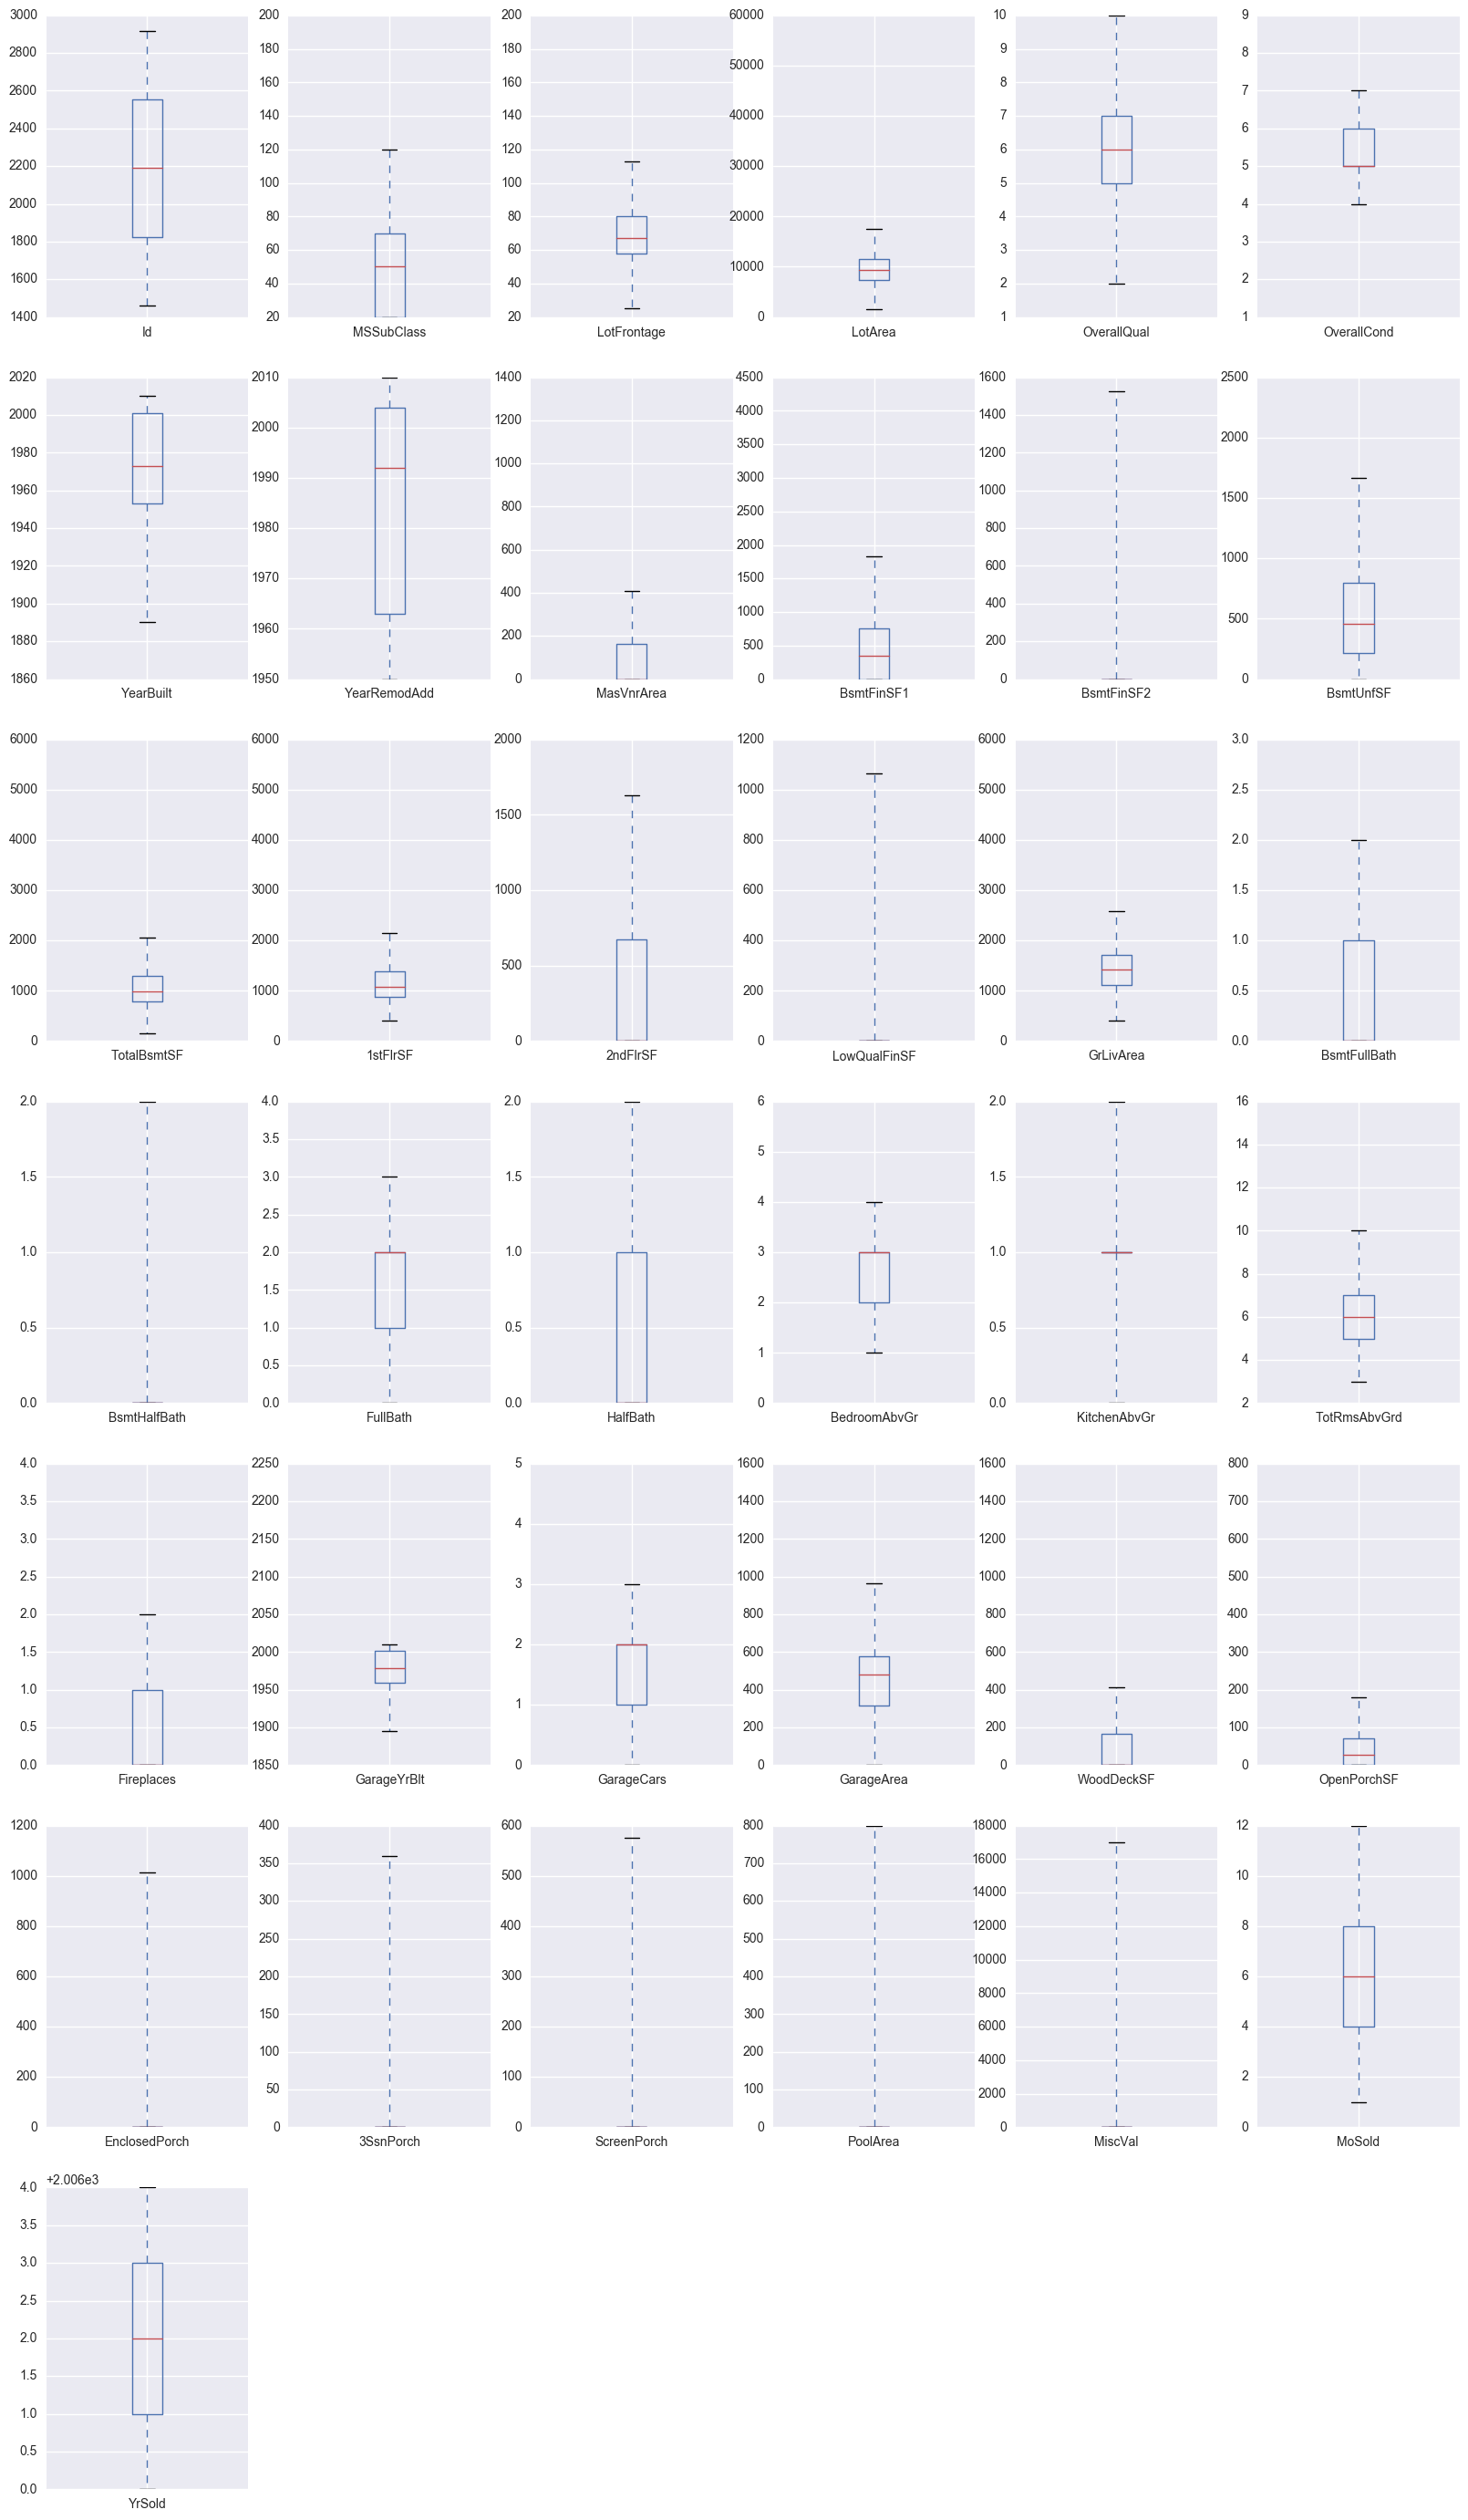

In [36]:
ames_test.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

### Target Analysis

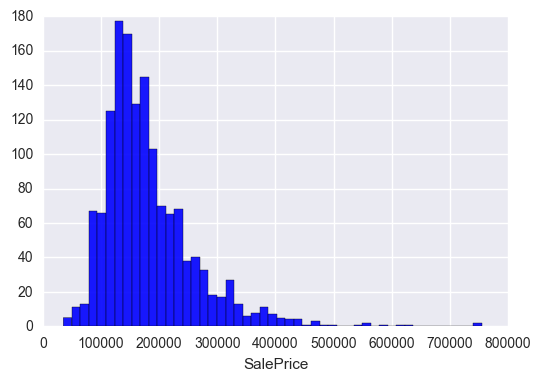

In [37]:
sns.distplot(ames_train['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})
plt.show()

Take the log transform to make target look more like a normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125075d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124624790>]], dtype=object)

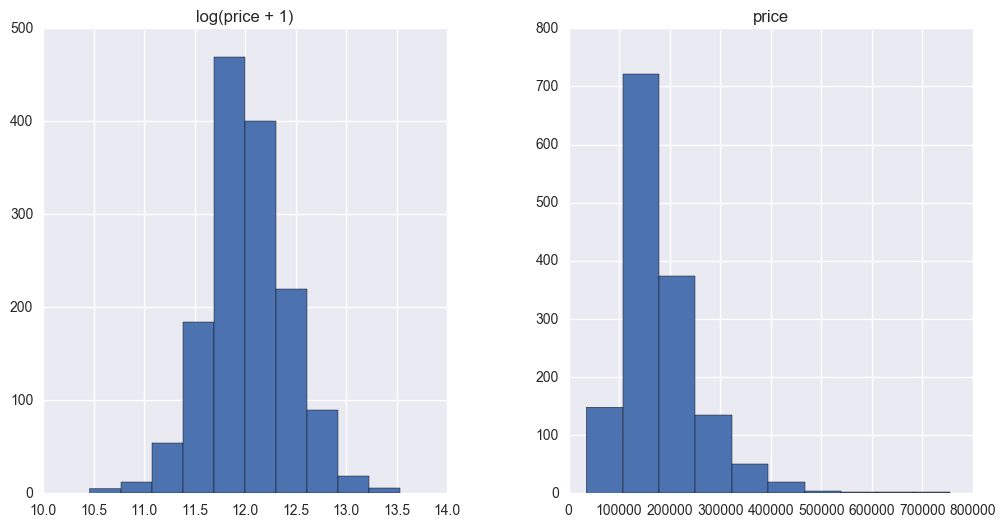

In [38]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":ames_train["SalePrice"], "log(price + 1)":np.log1p(ames_train["SalePrice"])})
prices.hist()

In [39]:
#log transform the target:
ames_train["SalePrice"] = np.log1p(ames_train["SalePrice"])

### Multimodal Data Visualizations

In [40]:
categorical_features=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                      'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                      'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
                      'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                      'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                      'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                      'MiscFeature','SaleType','SaleCondition']
non_categorical_features = [col for col in ames_train.columns if col not in categorical_features and col not in ['Id', 'SalePrice']]
y = ames_train['SalePrice']

## Pre-Process Data

Since test data contains values not present in training data, we must create a superset of all values of categorical features then apply one hot encoding.

In [41]:
all_data = pd.concat((ames_train.loc[:,'MSSubClass':'SaleCondition'],
                      ames_test.loc[:,'MSSubClass':'SaleCondition']))

In [42]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [43]:
all_data[numeric_feats] = np.log1p(all_data[numeric_feats])

In [44]:
all_data = pd.get_dummies(all_data)
# all_data_fill_na = all_data.fillna(all_data.mean())

imputer = Imputer()
imputed_all_data = imputer.fit_transform(all_data)

In [46]:
# creating matrices for sklearn:
X_train = imputed_all_data[:ames_train.shape[0]]
X_test = imputed_all_data[ames_test.shape[0]:]
y = ames_train.SalePrice

In [47]:
# check dims of data
print X_train.shape
print X_test.shape
print y.shape

(1459, 288)
(1459, 288)
(1459,)


## Feature Selection via Principle Component Analysis

In [48]:
# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(X_train)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

Explained Variance: [ 0.18761586  0.15598105  0.10547742  0.0839439 ]
[[  8.13429612e-02  -7.76018275e-03  -1.19686891e-02 ...,  -2.47409190e-05
   -1.07874516e-03   1.72401826e-03]
 [  3.98365306e-02   1.36814555e-02   2.65276541e-02 ...,  -1.08147545e-03
   -4.66787972e-03   1.45607719e-02]
 [ -6.98060765e-02   1.15091624e-02   4.02184490e-03 ...,   1.20450779e-03
   -2.66545811e-02   2.83490703e-02]
 [  3.86360330e-03  -4.32657006e-03   1.19810287e-02 ...,  -1.10035971e-04
    9.00162972e-03  -7.87543068e-03]]


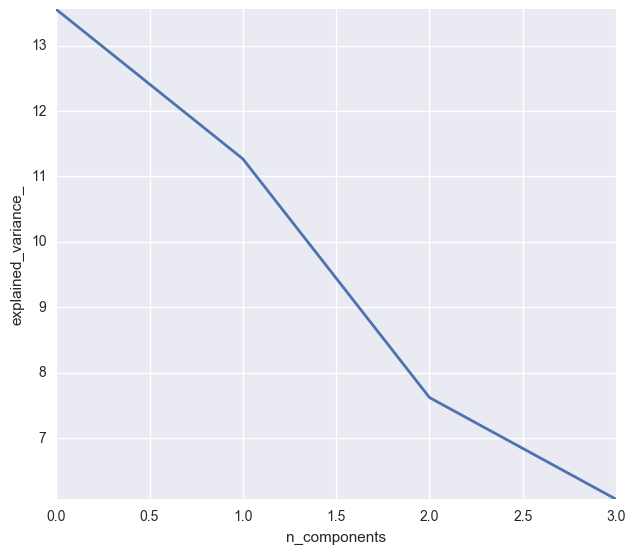

In [49]:
# Plot the PCA spectrum

plt.figure(1, figsize=(8, 7))
plt.clf()
plt.axes([.2, .2, .7, .7])
# returns a vector of the variance explained by each dimension
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

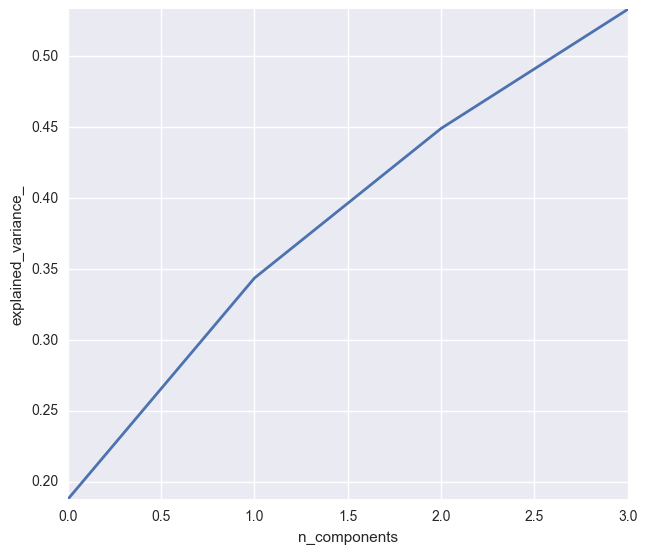

In [50]:
#  the cumulative variance explained by the first i dimensions
plt.figure(1, figsize=(8, 7))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_.cumsum(), linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

Looks like most of the variance can be explained within first 3 principe components.

In [51]:
# Fit the PCA model and transform X to get the principal components
df_plot = pd.DataFrame(pca.fit_transform(X_train), columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_plot

PC1    PC2    PC3    PC4
0     1.395  4.288 -2.400 -4.061
1    -3.877 -0.674 -0.428  3.792
2     1.700  4.225 -1.920 -3.978
3     3.490 -0.821 -3.776 -1.657
4     1.306  7.416 -0.826 -0.084
5     1.373  1.801 -3.901  1.940
6    -4.571  4.353  2.042  0.725
7     0.999  5.781 -3.028  0.949
8     6.186 -2.199  0.099  2.734
9    -3.062 -2.834 -1.718 -1.045
10   -3.616 -3.591 -1.856 -0.957
11    0.937  6.552 -1.802 -0.085
12   -3.875 -1.590 -1.028  2.767
13   -0.273  2.159  7.350  0.547
14   -3.480  0.692  0.687 -4.383
15    1.118 -2.444  4.549  2.126
16   -4.165 -0.490  0.182 -3.326
17    0.157 -6.954  0.416  0.814
18   -2.731 -1.535 -0.204 -1.482
19   -3.142 -3.739 -1.011 -1.094
20    5.389  5.725  3.931  0.305
21    1.424 -6.396  2.619 -0.641
22   -0.110  2.557  7.521  0.329
23   -3.171  0.390 -0.038  2.465
24   -3.532  0.040 -0.097  5.015
25   -0.005  0.499  6.569 -4.140
26   -3.588 -0.742 -0.550  4.469
27   -4.141  2.043  1.219 -4.016
28   -3.757  1.105  0.107  3.202
29    0.992 -5.151  3.217  2.649
...     ...    ...    ...    ...
1429 -3.735 -0.287  0.445 -3.939
1430  6.294  1.021  1.430  2.781
1431 -3.836 -2.234 -2.742 -0.549
1432  0.829 -6.032  2.957 -0.546
1433  4.990  1.000  1.730 -3.575
1434 -3.637  0.332 -0.003  3.436
1435 -0.020 -0.762  5.722 -3.733
1436 -3.234 -3.673 -1.408 -0.969
1437 -4.434  2.707  1.588 -4.523
1438 -2.409 -2.692 -1.017 -1.661
1439  1.360  1.988 -3.916 -3.023
1440  5.587 -0.402  0.826  4.346
1441 -4.335  2.169  1.173  0.978
1442  1.215  6.460 -1.500  0.252
1443  1.285 -4.300  3.694 -1.389
1444 -0.058  1.671  7.008  1.095
1445 -3.458 -5.592 -4.381  1.050
1446 -4.111  3.017  2.029  0.635
1447  1.021  5.025 -2.446 -4.468
1448  5.610 -0.165  1.147  3.161
1449 -2.836 -4.625 -2.082 -0.561
1450  6.374 -1.060  0.745  1.753
1451  0.140 -0.382  6.135 -3.590
1452 -4.059  0.035 -1.219 -2.540
1453  1.079 -3.406  4.687  2.103
1454 -2.399 -1.235  0.582 -1.518
1455  6.170 -1.168  0.800 -1.197
1456 -5.201  1.832  0.189  2.460
1457  3.239  0.701 -3.426 -1.485
1458 -3.526 -3.341 -2.251  6.094

[1459 rows x 4 columns]

In [52]:
# The loading vectors
pca_loadings = pd.DataFrame(pca.components_.T,  columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

V1         V2         V3         V4
0    8.134e-02  3.984e-02 -6.981e-02  3.864e-03
1   -7.760e-03  1.368e-02  1.151e-02 -4.327e-03
2   -1.197e-02  2.653e-02  4.022e-03  1.198e-02
3    4.495e-03  3.732e-02  1.484e-02 -5.160e-03
4    9.144e-04 -4.249e-03 -1.042e-02  3.440e-03
5   -7.967e-04  2.568e-03  1.650e-03  4.266e-05
6    8.396e-05  1.386e-03  9.266e-04  3.238e-04
7   -1.607e-01  5.373e-01  2.713e-01 -4.595e-01
8   -5.617e-01  3.136e-01 -6.336e-01 -7.811e-02
9   -1.268e-01 -3.106e-02 -1.929e-01  1.766e-01
10   1.319e-01  8.013e-02  3.182e-01 -1.406e-01
11  -5.911e-02  1.184e-01  3.487e-02 -3.297e-02
12  -3.400e-02  2.776e-02  3.564e-02 -3.837e-03
13   7.411e-01  3.644e-01 -4.890e-01 -3.684e-02
14   1.839e-02 -2.051e-02 -1.114e-02  9.121e-03
15   3.405e-02  6.049e-02 -6.268e-03 -8.183e-03
16  -4.666e-02  2.612e-02 -3.469e-02  1.028e-02
17  -4.082e-03  1.821e-03 -4.994e-03  1.760e-03
18   1.493e-02  3.240e-02  1.249e-02 -1.500e-03
19   3.839e-02  4.573e-02 -2.644e-02 -7.831e-03
20   2.118e-02  1.386e-02 -8.963e-03 -7.501e-03
21   2.628e-03 -4.050e-03 -8.684e-04 -7.136e-04
22   2.231e-02  2.876e-02 -2.076e-03 -5.074e-03
23   1.511e-04  4.669e-02  1.437e-03  3.824e-04
24  -1.708e-04  1.710e-03  1.367e-03  3.056e-04
25  -3.861e-03  5.070e-02  2.214e-02 -4.832e-03
26  -3.200e-02  1.707e-01  4.461e-02 -1.737e-02
27  -5.550e-02  4.197e-01  1.858e-01  8.305e-01
28   7.675e-02  3.409e-01  1.646e-01 -1.003e-01
29   8.387e-02 -1.633e-01 -9.386e-02 -2.202e-02
..         ...        ...        ...        ...
258 -9.046e-03  2.897e-02  4.330e-03 -9.105e-04
259  1.359e-02 -1.914e-02 -1.512e-03  1.726e-03
260  3.731e-03 -4.418e-03 -4.171e-04 -7.776e-06
261 -1.732e-02  2.356e-02  1.929e-03 -1.719e-03
262  2.131e-04  2.583e-04 -9.517e-04  2.272e-04
263 -2.720e-04  3.295e-04 -6.107e-04  4.309e-06
264  1.031e-04  6.128e-04  1.148e-05  7.807e-04
265  1.568e-03  1.066e-03 -3.605e-03  2.793e-03
266 -4.360e-03 -3.677e-03 -4.173e-03  9.124e-05
267 -4.391e-03 -1.149e-02 -9.460e-03  6.883e-03
268 -1.279e-03 -1.996e-04 -1.528e-03  1.152e-03
269 -5.739e-05 -1.011e-04 -5.398e-04  3.013e-04
270  1.607e-04 -4.944e-04 -3.194e-04 -6.724e-05
271 -7.721e-04 -2.973e-03 -2.551e-03  4.349e-03
272  3.267e-05  2.584e-04 -4.352e-04 -3.672e-04
273 -1.873e-03 -3.677e-03  3.608e-04 -3.914e-03
274 -2.517e-04  2.620e-04 -7.340e-04  6.909e-04
275  1.091e-05  1.876e-04 -8.101e-05  6.519e-04
276  1.570e-04 -1.049e-03  6.424e-04 -1.067e-03
277  2.739e-04  1.484e-04 -2.855e-05 -3.214e-04
278  2.773e-04 -3.088e-04 -5.752e-04  8.150e-04
279  2.043e-03  1.496e-02  2.802e-02 -7.305e-03
280 -2.974e-04 -7.009e-04  3.772e-05  3.300e-04
281 -3.395e-04 -9.825e-03 -2.764e-02  1.012e-02
282 -2.681e-04 -6.495e-03 -1.808e-03 -1.378e-03
283  1.935e-04 -8.611e-04 -4.716e-04 -4.828e-04
284 -5.459e-04 -1.456e-03 -6.192e-04  8.447e-04
285 -2.474e-05 -1.081e-03  1.205e-03 -1.100e-04
286 -1.079e-03 -4.668e-03 -2.665e-02  9.002e-03
287  1.724e-03  1.456e-02  2.835e-02 -7.875e-03

[288 rows x 4 columns]

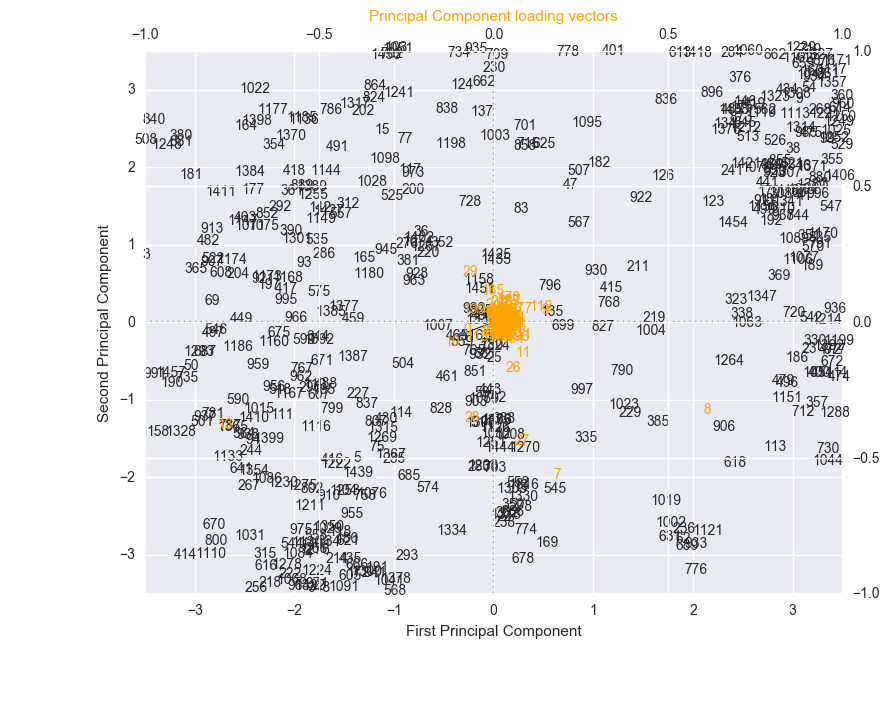

In [53]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3]);

In [54]:
df2_plot = pd.DataFrame(pca.fit_transform(X_train))

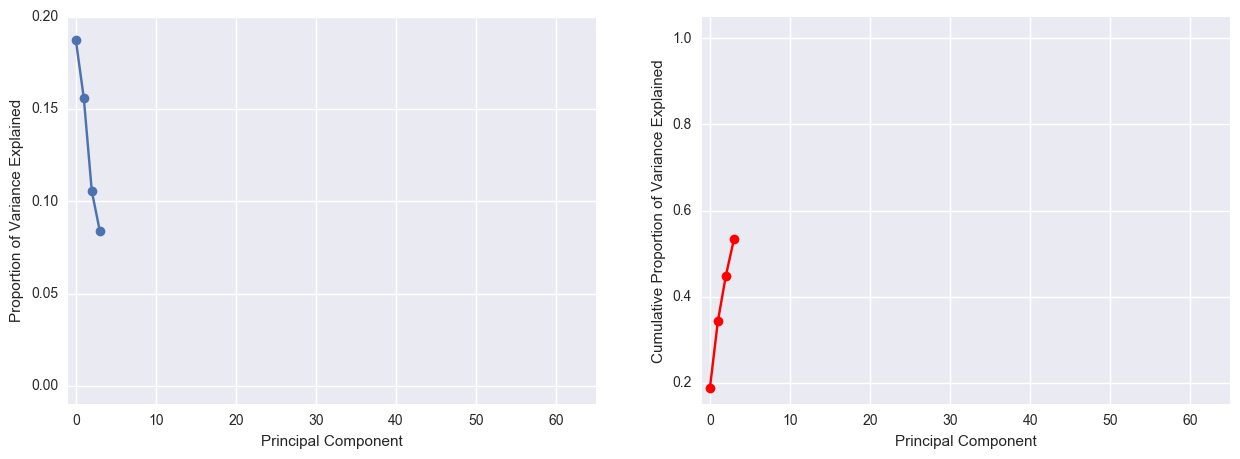

In [55]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65) 

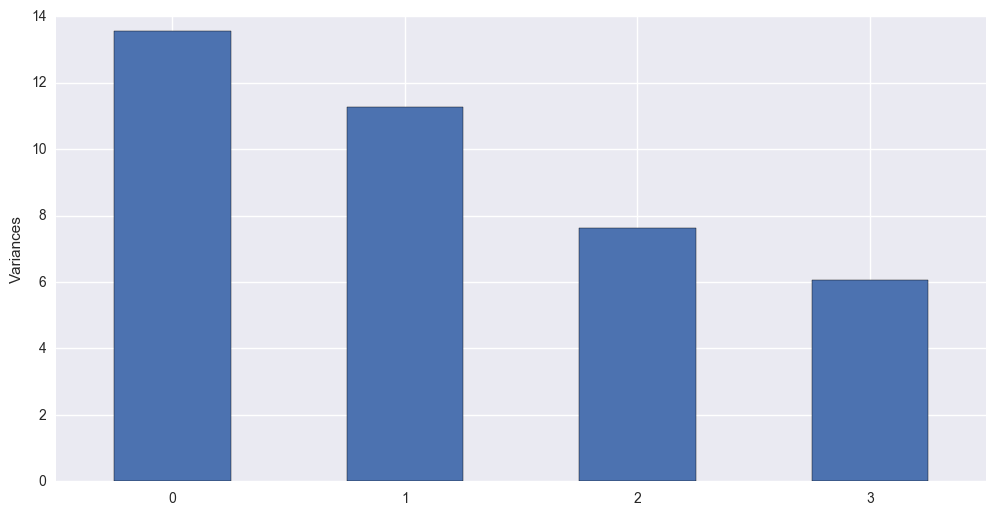

In [56]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

### Plot algorithm score distributions for comparison

In [57]:
def plot_model_score_distribution(results, names):
    ymin = .1
    ymax = .5
    fig = plt.figure(figsize=(25,15)) 
    fig.suptitle('Algorithm Comparison') 
    ax = fig.add_subplot(111) 
    plt.boxplot(results) 
    ax.set_ylim([ymin,ymax])
    ax.set_xticklabels(names)
    plt.show()

### Hyper-parameter search

In [58]:
def local_cv(model, params):
    param_grid = params
    kfold = KFold(n_splits=num_folds, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train, y)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    for params, mean_score, scores in grid_result.grid_scores_:
        print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

### Evaluation metric for local cross validation

In [59]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

## Evaluate Algorithms (Spot Check)

LASSO: 0.398762 (0.027284)
Ridge: 0.129933 (0.021192)
CART: 0.193292 (0.019059)
KNeighborsRegressor: 0.237930 (0.017289)
XGBRegressor: 0.129797 (0.021415)
GradientBoostingRegressor: 0.125440 (0.018722)
AdaBoostRegressor: 0.175957 (0.013958)
RandomForestRegressor: 0.153526 (0.019297)
ExtraTreesRegressor: 0.152089 (0.023037)
SVR: 0.135390 (0.020763)


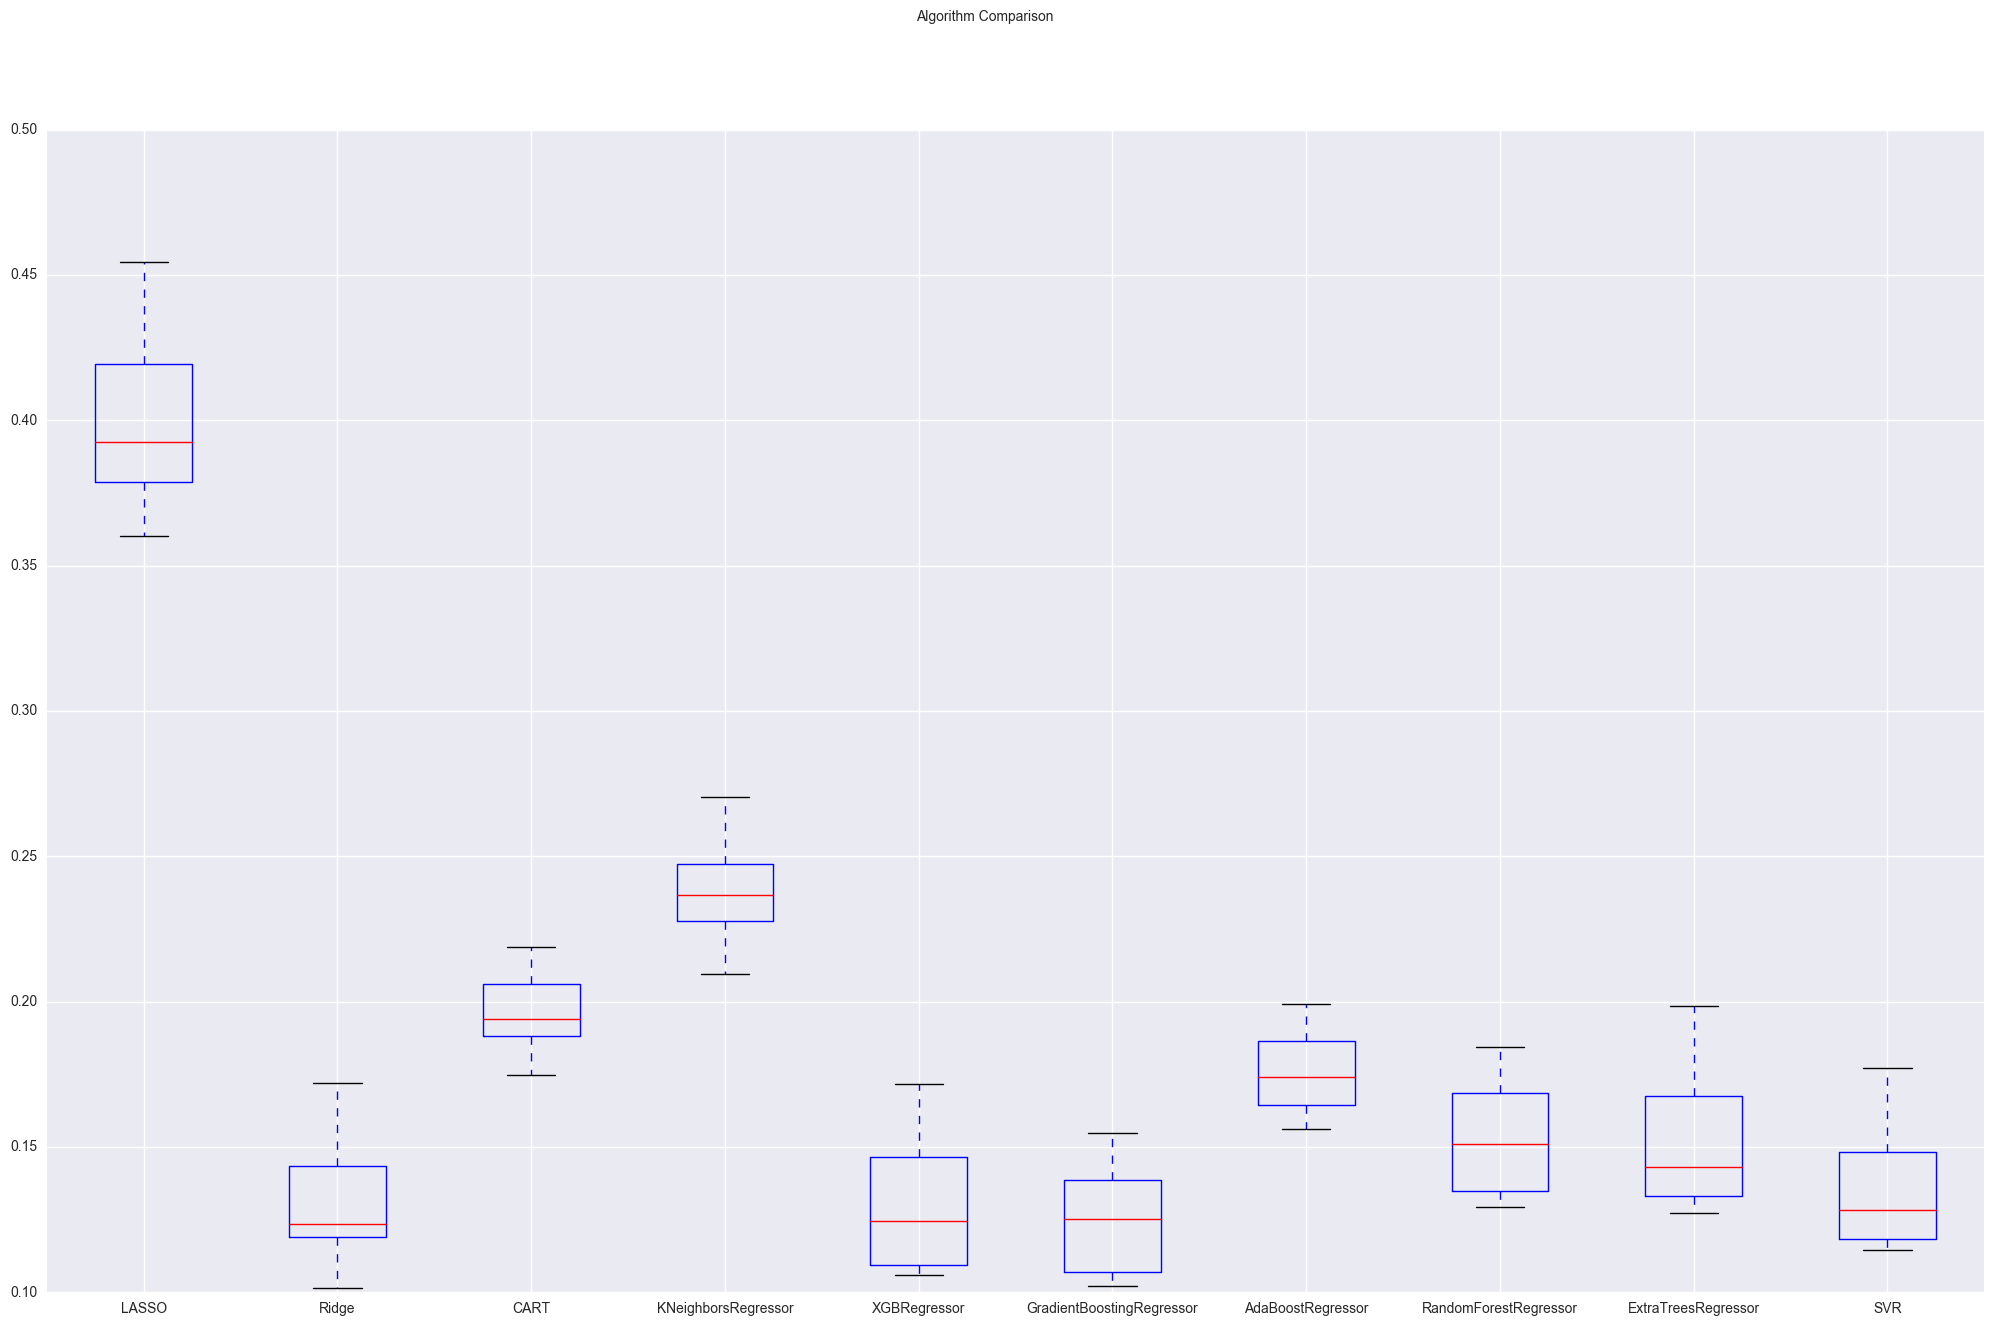

In [60]:
from sklearn.linear_model import Lasso, Ridge  
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train) 
seed = 7
scoring = 'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(('LASSO', Lasso())) 
models.append(('Ridge', Ridge())) 
models.append(('CART', DecisionTreeRegressor())) 
models.append(('KNeighborsRegressor', KNeighborsRegressor())) 
models.append(('XGBRegressor', xgb.XGBRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = rmse_cv(model)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
plot_model_score_distribution(results, names)

XGBoost, GradientBoostingRegressor and Ridge seem to be the more promising from first impressions.

## Evaluate Algorithms with Standardization

ScaledLASSO: 0.398762 (0.027284)
ScaledRidge: 0.135862 (0.026519)
ScaledCART: 0.189709 (0.022052)
ScaledKNN: 0.197759 (0.018980)
ScaledXGBRegressor: 0.129797 (0.021415)
ScaledGradientBoostingRegressor: 0.125931 (0.018366)
ScaledAdaBoostRegressor: 0.176386 (0.011455)
ScaledRandomForest: 0.150491 (0.016641)
ScaledExtraTrees: 0.148834 (0.019462)
ScaledSVR: 0.189114 (0.025751)


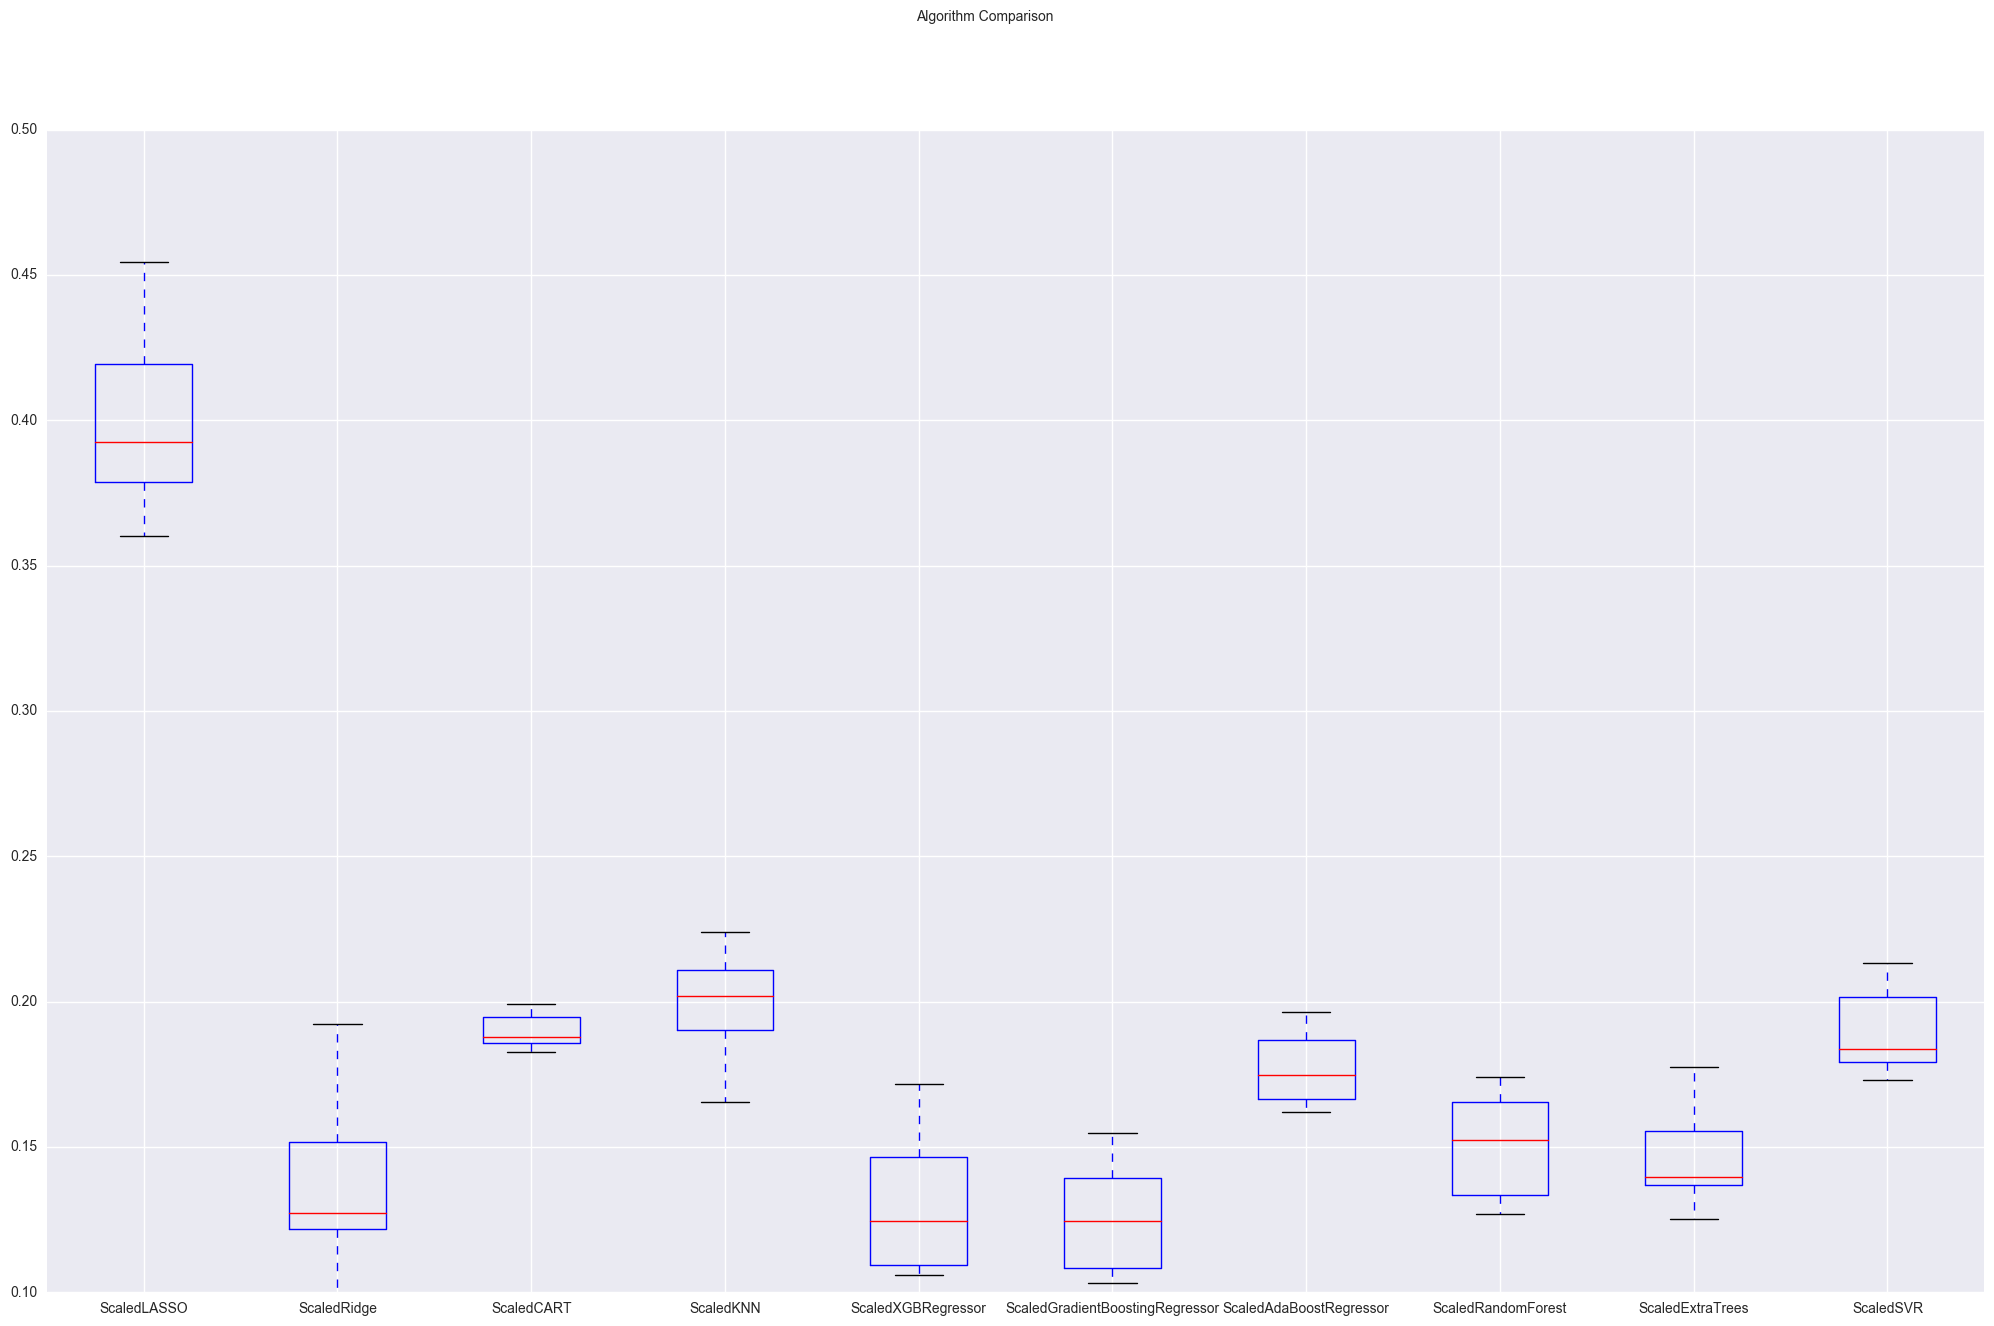

In [61]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
    Lasso())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', 
    Ridge())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', 
    DecisionTreeRegressor())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', 
    KNeighborsRegressor())])))
pipelines.append(('ScaledXGBRegressor', Pipeline([('Scaler', StandardScaler()),('XGB', 
    xgb.XGBRegressor())])))
pipelines.append(('ScaledGradientBoostingRegressor', Pipeline([('Scaler', StandardScaler()),('GradientBoostingRegressor', 
    GradientBoostingRegressor())])))
pipelines.append(('ScaledAdaBoostRegressor', Pipeline([('Scaler', StandardScaler()),('AdaBoostRegressor', 
    AdaBoostRegressor())])))
pipelines.append(('ScaledRandomForest', Pipeline([('Scaler', StandardScaler()),('RandomForest', 
    RandomForestRegressor())])))
pipelines.append(('ScaledExtraTrees', Pipeline([('Scaler', StandardScaler()),('ExtraTrees', 
    ExtraTreesRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', 
    SVR())]))) 
results = []
names = []
for name, model in pipelines:
    cv_results = rmse_cv(model)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
plot_model_score_distribution(results, names)

Similar results to what we saw above.

## Tune Ensemble Methods

### Tune XGBoost

In [62]:
# find out params to tune for XGBoost 
xgb.XGBRegressor().get_params().keys()

['reg_alpha',
 'colsample_bytree',
 'silent',
 'colsample_bylevel',
 'scale_pos_weight',
 'learning_rate',
 'missing',
 'max_delta_step',
 'nthread',
 'base_score',
 'n_estimators',
 'subsample',
 'reg_lambda',
 'seed',
 'min_child_weight',
 'objective',
 'max_depth',
 'gamma']

In [63]:
params = {"max_depth":[2,3,4], "n_estimators":[200,300,400]}
local_cv(xgb.XGBRegressor(), params)

Best: -0.015550 using {'n_estimators': 400, 'max_depth': 2}
-0.016074 (0.005167) with: {'n_estimators': 200, 'max_depth': 2}
-0.015725 (0.005464) with: {'n_estimators': 300, 'max_depth': 2}
-0.015552 (0.005541) with: {'n_estimators': 400, 'max_depth': 2}
-0.016216 (0.005914) with: {'n_estimators': 200, 'max_depth': 3}
-0.015999 (0.006062) with: {'n_estimators': 300, 'max_depth': 3}
-0.015916 (0.006021) with: {'n_estimators': 400, 'max_depth': 3}
-0.016450 (0.005620) with: {'n_estimators': 200, 'max_depth': 4}
-0.016382 (0.005605) with: {'n_estimators': 300, 'max_depth': 4}
-0.016301 (0.005592) with: {'n_estimators': 400, 'max_depth': 4}


/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Tune GBM

In [64]:
GradientBoostingRegressor().get_params().keys()

['presort',
 'loss',
 'verbose',
 'subsample',
 'max_leaf_nodes',
 'learning_rate',
 'warm_start',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'init',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'alpha',
 'max_depth']

In [65]:
params = {"max_depth":[2,3,4], "n_estimators":[200,300,400]}
local_cv(GradientBoostingRegressor(), params)

Best: -0.015467 using {'n_estimators': 400, 'max_depth': 3}
-0.016053 (0.005969) with: {'n_estimators': 200, 'max_depth': 2}
-0.015976 (0.006292) with: {'n_estimators': 300, 'max_depth': 2}
-0.015590 (0.006215) with: {'n_estimators': 400, 'max_depth': 2}
-0.015606 (0.005012) with: {'n_estimators': 200, 'max_depth': 3}
-0.015586 (0.004972) with: {'n_estimators': 300, 'max_depth': 3}
-0.015470 (0.005221) with: {'n_estimators': 400, 'max_depth': 3}
-0.015968 (0.005181) with: {'n_estimators': 200, 'max_depth': 4}
-0.015777 (0.004832) with: {'n_estimators': 300, 'max_depth': 4}
-0.015578 (0.004663) with: {'n_estimators': 400, 'max_depth': 4}


/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Tune RF

In [66]:
RandomForestRegressor().get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth']

In [67]:
params = {"max_depth":[2,3,4], "n_estimators":[200,300,400,500]}
local_cv(RandomForestRegressor(), params)

Best: -0.030454 using {'n_estimators': 500, 'max_depth': 4}
-0.054674 (0.008192) with: {'n_estimators': 200, 'max_depth': 2}
-0.054724 (0.008164) with: {'n_estimators': 300, 'max_depth': 2}
-0.054894 (0.008230) with: {'n_estimators': 400, 'max_depth': 2}
-0.054748 (0.008102) with: {'n_estimators': 500, 'max_depth': 2}
-0.038314 (0.006862) with: {'n_estimators': 200, 'max_depth': 3}
-0.038493 (0.007083) with: {'n_estimators': 300, 'max_depth': 3}
-0.038396 (0.006907) with: {'n_estimators': 400, 'max_depth': 3}
-0.038503 (0.007018) with: {'n_estimators': 500, 'max_depth': 3}
-0.030547 (0.006246) with: {'n_estimators': 200, 'max_depth': 4}
-0.030648 (0.006180) with: {'n_estimators': 300, 'max_depth': 4}
-0.030586 (0.006282) with: {'n_estimators': 400, 'max_depth': 4}
-0.030455 (0.006271) with: {'n_estimators': 500, 'max_depth': 4}


/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Tune Ridge

In [68]:
Ridge().get_params().keys()

['normalize',
 'fit_intercept',
 'max_iter',
 'random_state',
 'tol',
 'copy_X',
 'alpha',
 'solver']

In [69]:
params = {"alpha":[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}
local_cv(Ridge(), params)

Best: -0.016458 using {'alpha': 5}
-0.019154 (0.007170) with: {'alpha': 0.05}
-0.018896 (0.006830) with: {'alpha': 0.1}
-0.018252 (0.006255) with: {'alpha': 0.3}
-0.017332 (0.005775) with: {'alpha': 1}
-0.016636 (0.005569) with: {'alpha': 3}
-0.016458 (0.005540) with: {'alpha': 5}
-0.016468 (0.005564) with: {'alpha': 10}
-0.016672 (0.005606) with: {'alpha': 15}
-0.017529 (0.005699) with: {'alpha': 30}
-0.018698 (0.005764) with: {'alpha': 50}
-0.020015 (0.005806) with: {'alpha': 75}


/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Tune SVR

In [70]:
SVR().get_params().keys()

['kernel',
 'C',
 'verbose',
 'degree',
 'epsilon',
 'shrinking',
 'max_iter',
 'tol',
 'cache_size',
 'coef0',
 'gamma']

In [71]:
params = {"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}
local_cv(SVR(), params)

Best: -0.021827 using {'C': 1.0, 'gamma': 0.01}
-0.021824 (0.006554) with: {'C': 1.0, 'gamma': 0.01}
-0.093294 (0.014832) with: {'C': 1.0, 'gamma': 0.10000000000000001}
-0.159246 (0.022259) with: {'C': 1.0, 'gamma': 1.0}
-0.159698 (0.022250) with: {'C': 1.0, 'gamma': 10.0}
-0.159778 (0.022232) with: {'C': 1.0, 'gamma': 100.0}
-0.022038 (0.006197) with: {'C': 10.0, 'gamma': 0.01}
-0.093102 (0.014861) with: {'C': 10.0, 'gamma': 0.10000000000000001}
-0.159250 (0.022253) with: {'C': 10.0, 'gamma': 1.0}
-0.159702 (0.022244) with: {'C': 10.0, 'gamma': 10.0}
-0.159782 (0.022226) with: {'C': 10.0, 'gamma': 100.0}
-0.022038 (0.006197) with: {'C': 100.0, 'gamma': 0.01}
-0.093102 (0.014861) with: {'C': 100.0, 'gamma': 0.10000000000000001}
-0.159250 (0.022253) with: {'C': 100.0, 'gamma': 1.0}
-0.159702 (0.022244) with: {'C': 100.0, 'gamma': 10.0}
-0.159782 (0.022226) with: {'C': 100.0, 'gamma': 100.0}
-0.022038 (0.006197) with: {'C': 1000.0, 'gamma': 0.01}
-0.093102 (0.014861) with: {'C': 1000.0, 

/Users/arm/anaconda2/envs/py2k/lib/python2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


## Tune Linear Models

In [72]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

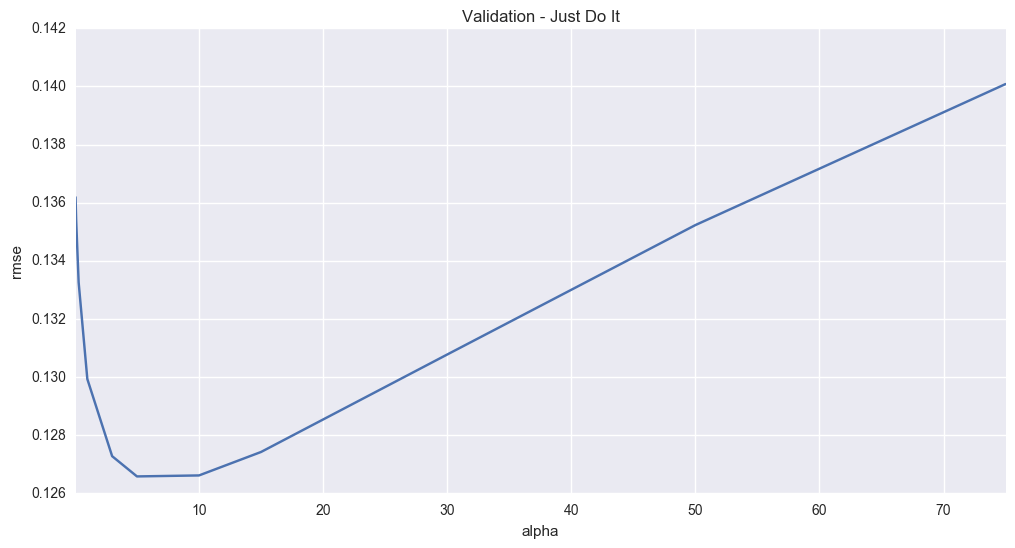

In [73]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [74]:
cv_ridge.min()

0.12658198933915574

In [75]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [76]:
rmse_cv(model_lasso).mean()

0.12266319474738172

In [77]:
coef = pd.Series(model_lasso.coef_)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 177 variables


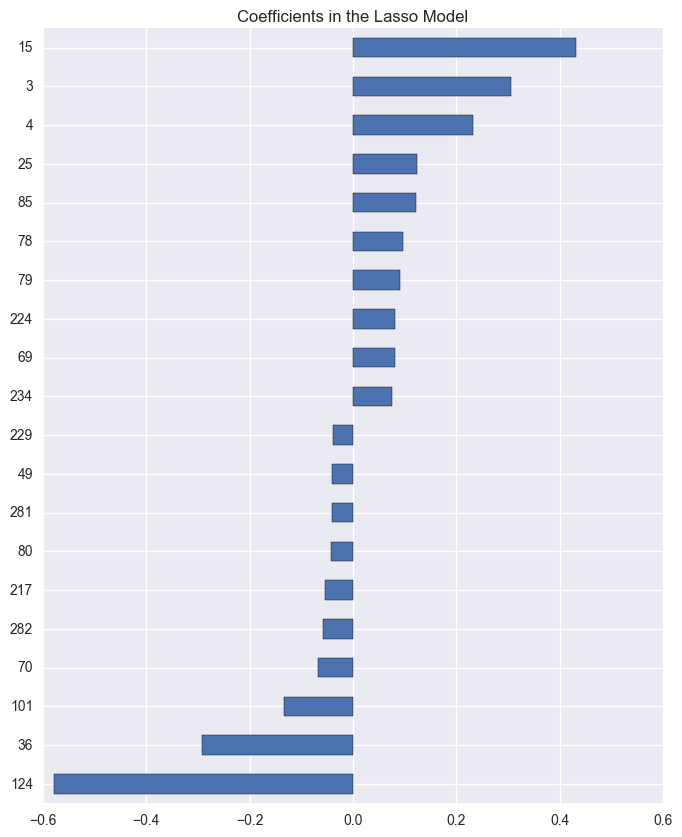

In [78]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

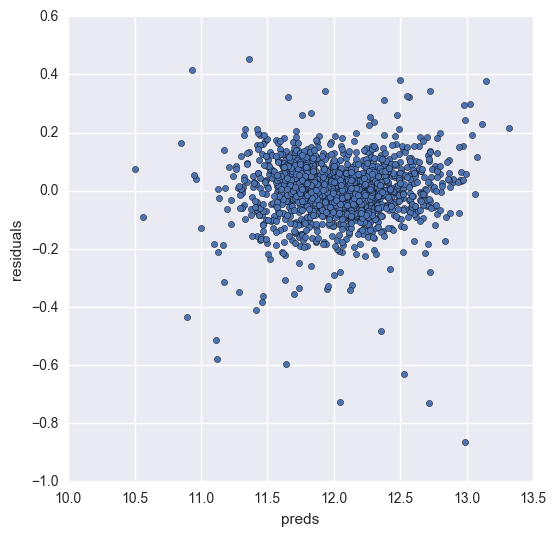

In [79]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [80]:
lasso_preds = np.expm1(model_lasso.predict(X_test))

## Finalize Model

     test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0            10.380      1.144e-03           10.380       5.291e-04
1             9.345      1.230e-03            9.345       5.338e-04
2             8.413      1.320e-03            8.413       5.441e-04
3             7.575      1.148e-03            7.575       5.276e-04
4             6.820      6.495e-04            6.820       5.005e-04
5             6.142      2.601e-04            6.141       4.666e-04
6             5.530      7.850e-04            5.529       4.452e-04
7             4.979      9.468e-04            4.979       4.135e-04
8             4.484      1.793e-03            4.484       3.983e-04
9             4.038      1.779e-03            4.038       3.713e-04
10            3.637      1.888e-03            3.637       3.482e-04
11            3.276      1.554e-03            3.276       3.472e-04
12            2.952      1.763e-03            2.951       3.233e-04
13            2.659      1.781e-03            2.

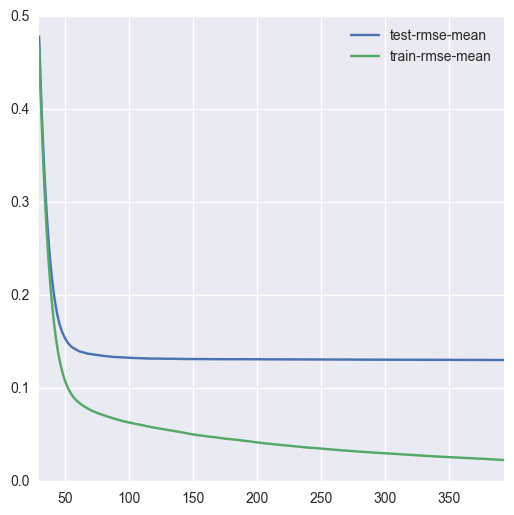

In [81]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

num_rounds = 100
n_estimators = 360
max_depth = 4
learning_rate = 0.1
seed = 42
params = {"max_depth":max_depth, "eta":learning_rate, "seed": seed}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=num_rounds)
print model
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [82]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()

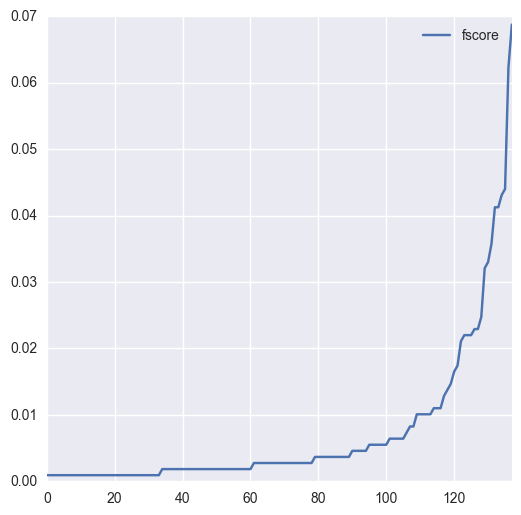

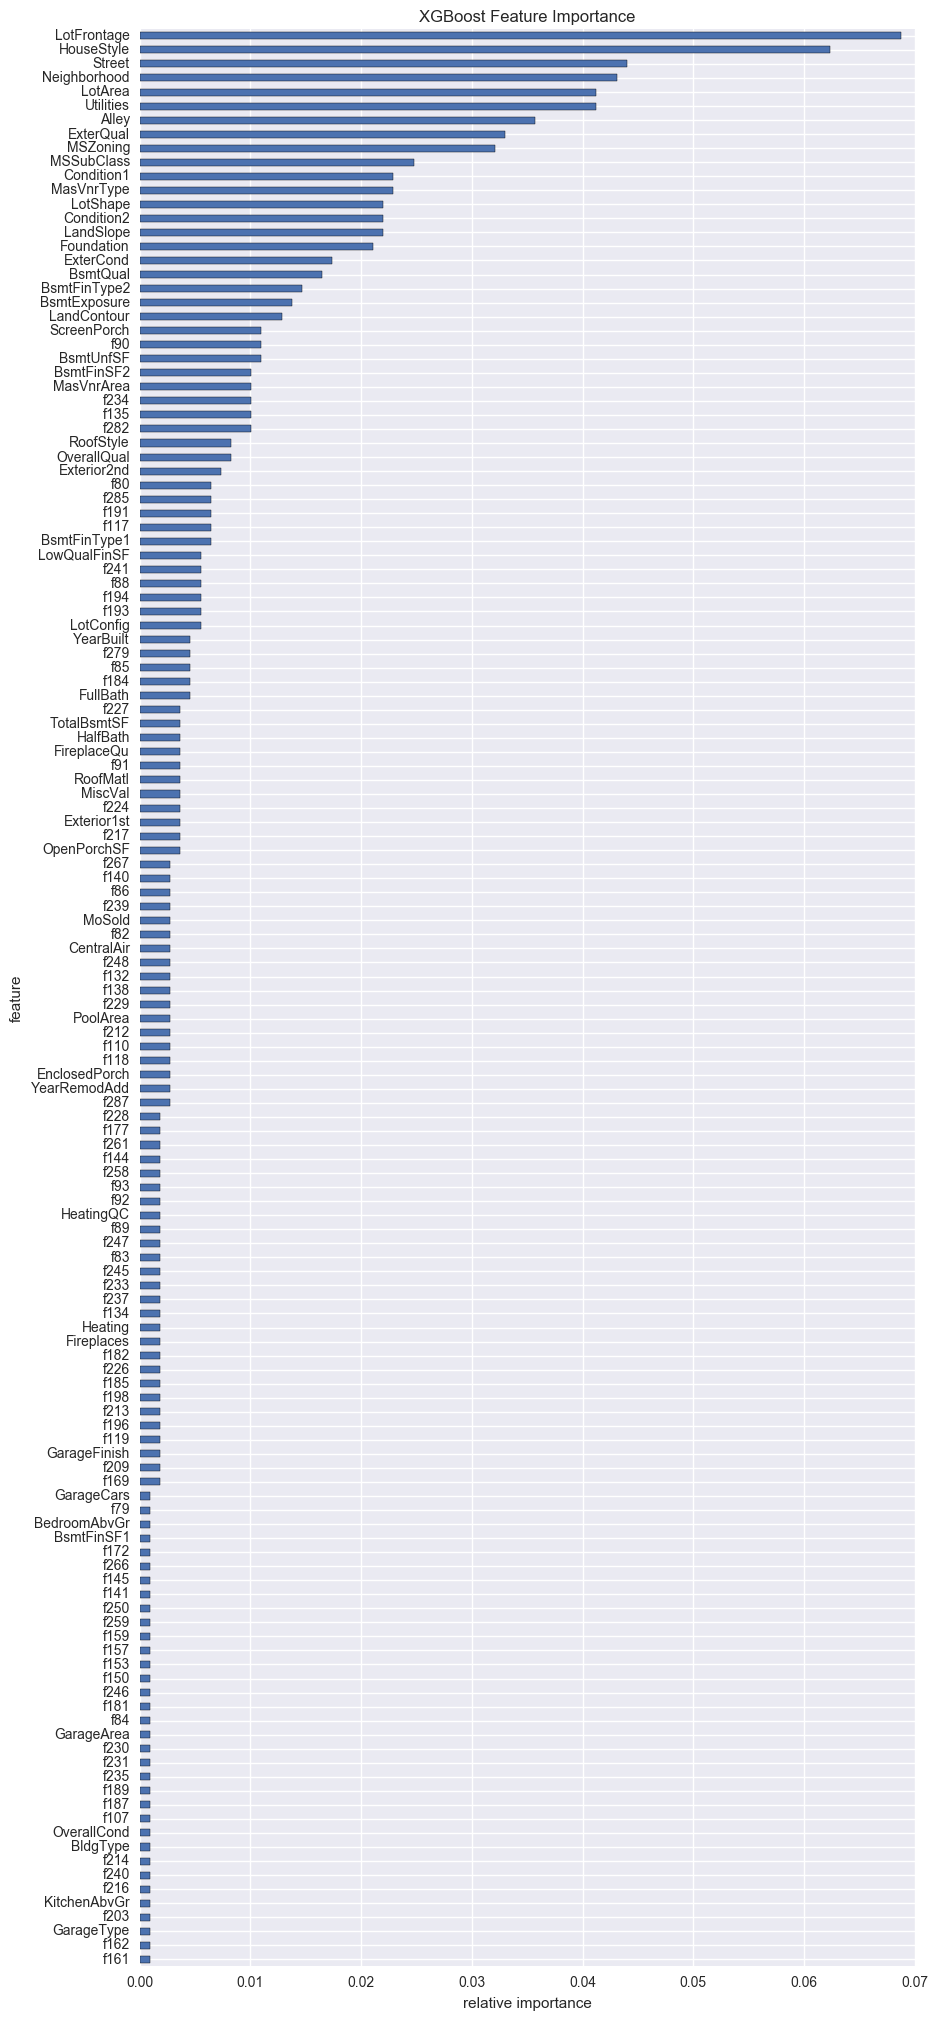

In [83]:
# feature importances 
# model_xgb.booster().get_score(importance_type='weight') only returns encoded feature names (f's)
# code below preserves feature names
features = ames_test.drop(['Id'], axis=1).columns
ceate_feature_map(features)

gbdt = xgb.train(params, dtrain, num_rounds)
import operator 
importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 25))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [84]:
model_xgb = xgb.XGBRegressor(n_estimators=num_rounds, max_depth=max_depth, learning_rate=learning_rate) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [85]:
# make predictions for test data
xgb_preds = np.expm1(model_xgb.predict(X_test))

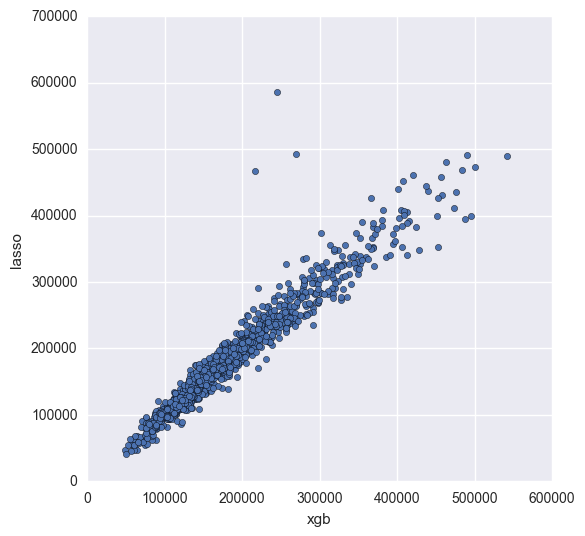

In [86]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

## GBM

In [87]:
gbm_model = GradientBoostingRegressor(max_depth=3, n_estimators=200)
gbm_model.fit(X_train, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [88]:
gbm_model_preds = np.expm1(gbm_model.predict(X_test))

## Create Ensemble of two best models

In [90]:
# evaluate predictions
preds = 0.8*lasso_preds + 0.2*xgb_preds  
submission = pd.DataFrame({"id":ames_test.Id, "SalePrice":preds})
submission = submission[['id','SalePrice']]
submission.to_csv("xgb_lasso_sub_5_1lasso1xgb1deep.csv", index = False)

## Deep Learning - Keras w/ TensorFlow 

### Develop a Baseline Neural Network Model

In [91]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(288, input_dim=288, init='normal', activation='relu')) 
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
# keras_preds = np.expm1(estimator.predict(X_test))
kfold = KFold(n_splits=10, random_state=seed)
results = rmse_cv(estimator)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.15 (0.02) MSE


### Standardizing the Dataset

In [92]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(288, input_dim=288, init='normal', activation='relu')) 
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50,
    batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = rmse_cv(estimator)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.16 (0.03) MSE


### Evaluate a Deeper Network Topology

In [93]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(288, input_dim=288, init='normal', activation='relu')) 
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50,
    batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.16 (0.03) MSE


### Evaluate a Wider Network Topology

In [95]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=288, init='normal', activation='relu')) 
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50,
    batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: 0.16 (0.03) MSE
